In [1]:
import numpy as np 
import matplotlib
# Forces the non-interactive backend designed for file output
matplotlib.use('Agg') 
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import pandas as pd
import math

#Color palette
colors = [
    '#000000',  # Black
    '#E69F00',  # Orange
    '#56B4E9',  # Sky Blue
    '#009E73',  # Bluish Green
    '#F0E442',  # Yellow
    'purple',  # Blue
    '#D55E00',  # Vermilion
]

# Style settings
# --- Corrected rcParams Block ---
plt.rcParams.update({
    ## Text and Font Settings
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "axes.labelsize": 25,
    "font.size": 16,
    "legend.fontsize": 16,
    "text.latex.preamble": r"\usepackage{amsmath}",

    ## Tick Settings
    "xtick.labelsize": 22,
    "ytick.labelsize": 22,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "xtick.major.size": 8,
    "ytick.major.size": 8,
    "xtick.minor.size": 4,
    "ytick.minor.size": 4,
    
    ## Axes Line Width (for a bolder border)
    "axes.linewidth": 1.5,
    
    ## Turn the default grid OFF in rcParams
    "axes.grid": False,
})

In [2]:
import sys
# !{sys.executable} -m pip install scipy

In [3]:
# Load data
dir = "../data" # Directory containing data files
plot_dir = "../image/plot"
input_noise = pd.read_csv(f"{dir}/Noise_sim_postlayout.csv")
gain = pd.read_csv(f"{dir}/Gain_mag_phase.csv")
drift = pd.read_csv(f"{dir}/gain_drift.csv")
gain_test = pd.read_csv(f"{dir}/CMRR_test.csv")
compare_opt = pd.read_csv(f"{dir}/compare_to_optimize1.csv")
compare_opt_1stage = pd.read_csv(f"{dir}/compare_to_optimize_1st_stage.csv")
compare_opt_1stage_ideal = pd.read_csv(f"{dir}/compare_to_optimize_1st_stage_ideal.csv")

                        

## Input noise plot 

In [4]:

col = ['f', 'LNA1', 'LNA2']
input_noise.columns = col

In [5]:
input_noise['LNA1'][0]/(3.66e-9)
input_noise['LNA2'][0]/(3.66e-9)

np.float64(1.1355601092896175)

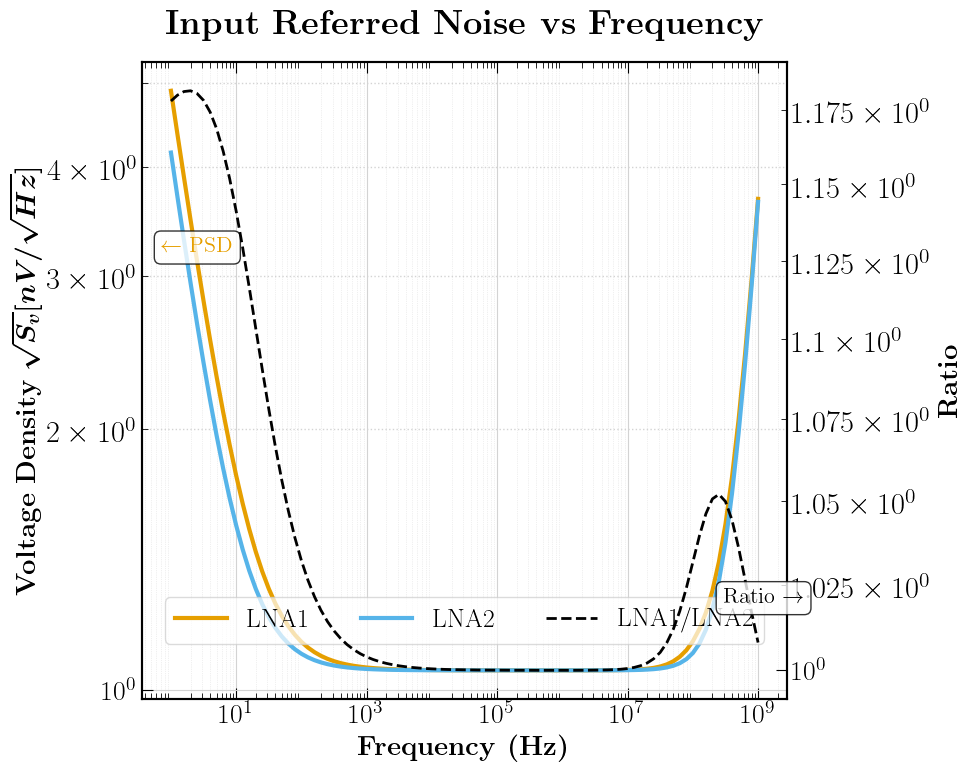

In [6]:

# --- 2. Plot Setup ---
fig, ax_left = plt.subplots(figsize=(10, 8))

# Create the Twin Axis sharing the X axis
ax_right = ax_left.twinx()

# --- 3. Plotting ---

# Plot Left Axis Data (Voltage Density)
# Note: We capture the plot objects (l1, l2) to use in the legend later
l1 = ax_left.loglog(input_noise['f'], input_noise['LNA1']*1e9, 
                    label='LNA1', color=colors[1], lw=3)
l2 = ax_left.loglog(input_noise['f'], input_noise['LNA2']*1e9, 
                    label='LNA2', color=colors[2], lw=3)

# Plot Right Axis Data (Ratio)
ratio_color = 'black'
l3 = ax_right.loglog(input_noise['f'], input_noise['LNA1']/input_noise['LNA2'], 
                     linestyle='--', label='LNA1/LNA2', color=ratio_color, lw=2)

# --- 4. Formatting ---

# Global Settings
plt.title(r'\textbf{Input Referred Noise vs Frequency}', fontsize=25, pad=20)
ax_left.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
ax_left.set_xlabel(r'\textbf{Frequency (Hz)}', fontsize=20)

# Left Y-Axis Formatting
ax_left.set_ylabel(r'\textbf{Voltage Density} $\boldsymbol{\sqrt{S_v} [nV/ \sqrt{Hz}]}$', 
                   fontsize=20)
ax_left.tick_params(axis='both', which='major', labelsize=20)

# Right Y-Axis Formatting
ax_right.set_ylabel(r'\textbf{Ratio}', fontsize=20, color=ratio_color)
ax_right.tick_params(axis='y', labelsize=20, colors=ratio_color) # Color the ticks to match
ax_right.spines['right'].set_color(ratio_color) # Color the spine to match

# --- 5. The Combined Legend ---
# We gather handles (lines) and labels from both axes
lines = l1 + l2 + l3  # Combine the lists of lines
labels = [l.get_label() for l in lines] # Extract labels

# Create one legend on the main axis
ax_left.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.18),
               fancybox=True, shadow=False, ncol=3, fontsize=18.5,
               framealpha=0.7)

# --- 6. Annotations (Explicit visual cues) ---

# Annotation for Left Axis
ax_left.annotate(r'$\leftarrow$  PSD    ', xy=(0.03, 0.7), xycoords='axes fraction',
                 fontsize=16, fontweight='bold', color=colors[1],
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec='black', alpha=0.8))

# Annotation for Right Axis
ax_right.annotate(r'Ratio $\rightarrow$', xy=(0.9, 0.15), xycoords='axes fraction',
                  fontsize=16, fontweight='bold', color=ratio_color,
                  bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=ratio_color, alpha=0.8))

# 1. Define the Locator
# This tells matplotlib to place ticks at 2, 3, 4...9 for every decade
minor_locator = LogLocator(base=10.0, subs=(0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9), numticks=12)

# 2. Apply it to the X-Axis
ax_left.xaxis.set_minor_locator(minor_locator)

# 3. Draw the Grids
ax_left.grid(True, which='major', linestyle='-', linewidth=0.8, color='lightgray')
ax_left.grid(True, which='minor', axis='x', linestyle=':', linewidth=0.5, color='lightgray', alpha=0.7)

plt.tight_layout()
plt.savefig(f"{plot_dir}/Input_Referred_Noise.png", dpi=300)
plt.show()


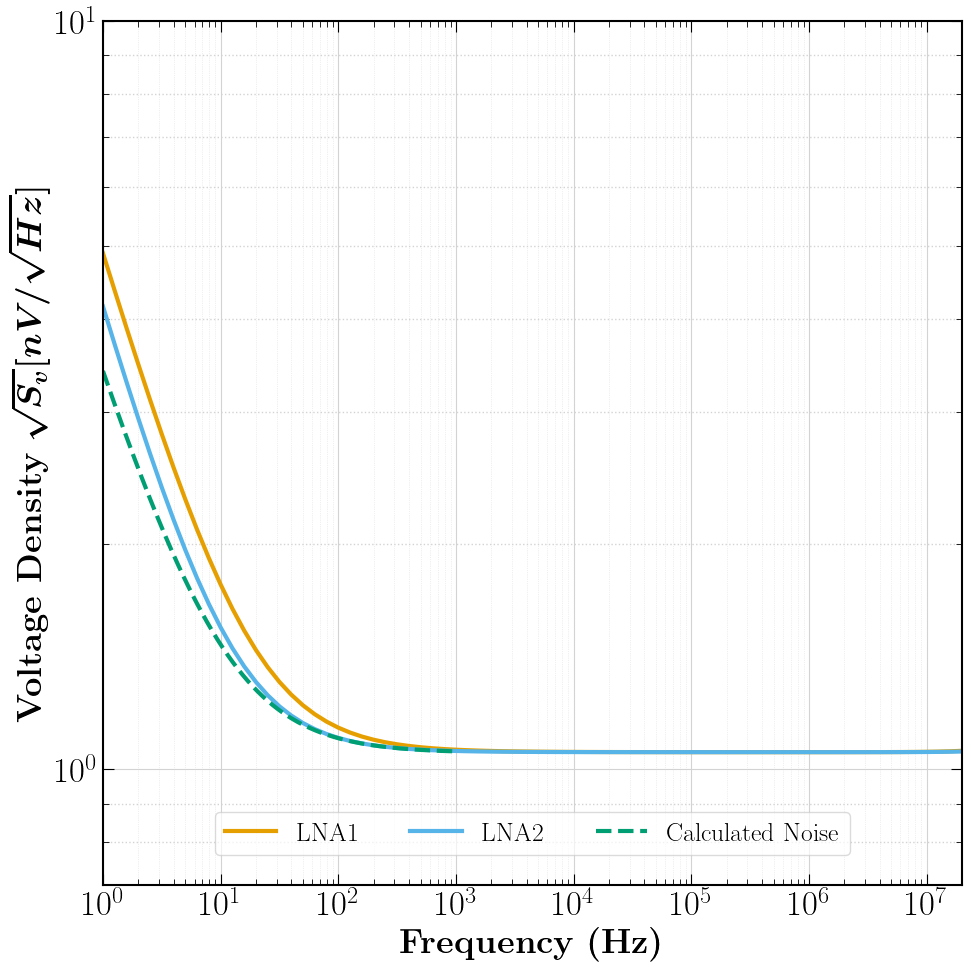

In [7]:
op_noiserti_result = pd.read_csv(f"{dir}/inputnoise_calculate_tot.csv")
op_noiserti_result.columns = ['f','noise']
# --- 2. Plot Setup ---
fig, ax_left = plt.subplots(figsize=(10, 10))


l1 = ax_left.loglog(input_noise['f'], input_noise['LNA1']*1e9, 
                    label='LNA1', color=colors[1], lw=3)
l2 = ax_left.loglog(input_noise['f'], input_noise['LNA2']*1e9, 
                    label='LNA2', color=colors[2], lw=3)
l3 = ax_left.loglog(op_noiserti_result['f'], op_noiserti_result['noise']*1e9,
               label='Calculated Noise', color=colors[3], lw=3, linestyle='--')

# --- 4. Formatting ---

# Global Settings
# plt.title(r'\textbf{Input Referred Noise vs Frequency}', fontsize=25, pad=20)
ax_left.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
ax_left.set_xlabel(r'\textbf{Frequency (Hz)}', fontsize=25)

# Left Y-Axis Formatting
ax_left.set_ylabel(r'\textbf{Voltage Density} $\boldsymbol{\sqrt{S_v} [nV/ \sqrt{Hz}]}$', 
                   fontsize=25)
ax_left.tick_params(axis='both', which='major', labelsize=25)


lines = l1 + l2 + l3 # Combine the lists of lines
labels = [l.get_label() for l in lines] # Extract labels

# Create one legend on the main axis
ax_left.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1),
               fancybox=True, shadow=False, ncol=3, fontsize=18.5,
               framealpha=0.7)

minor_locator = LogLocator(base=10.0, subs=(0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9), numticks=12)

# 2. Apply it to the X-Axis
ax_left.xaxis.set_minor_locator(minor_locator)

# 3. Draw the Grids
ax_left.grid(True, which='major', linestyle='-', linewidth=0.8, color='lightgray')
ax_left.grid(True, which='minor', axis='x', linestyle=':', linewidth=0.5, color='lightgray', alpha=0.7)
# Adjust x and y limits if necessary
ax_left.set_xlim(1, 20e6)
ax_left.set_ylim(7e-1,1e1)
plt.tight_layout()
# plt.savefig(f"{plot_dir}/Input_Referred_Noise.png", dpi=300)
plt.show()


More operation point

In [8]:
compare_opt.head()
compare_opt.columns = ['Rptat2','IcRc','Ic','Noise_1Hz','Noise_1kHz']
compare_opt_1stage.columns = ['Rptat2','Ic','Noise_1Hz','Noise_1kHz']
compare_opt_1stage_ideal.columns = ['Ic','Noise_1Hz','Noise_1kHz']
#Calculated 
opt_cal = pd.read_csv(f"{dir}/optimize_calculate_at_Nx50.csv")

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
/var/folders/v4/bwhrmml56zdgg4rlt5zykqp00000gp/T/ipykernel_41764/2604637691.py:10: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('Input Referred Noise (nV/$\sqrt{Hz}$)', fontsize=20)
/var/folders/v4/bwhrmml56zdgg4rlt5zykqp00000gp/T/ipykernel_41764/2604637691.py:34: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('Input Referred Noise (nV/$\sqrt{Hz}$)', fontsize=20)
/var/folders/v4/bwhrmml56zdgg4rlt5zykqp00000gp/T/ipykernel_41764/2604637691.py:10: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('Input Referred Noise (nV/$\sqrt{Hz}$)', fontsize=20)
/var/folders/v4/bwhrmml56zdgg4rlt5zykqp00000gp/T/ipykernel_41764/2604637691.py:34: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('Input Referred Noise (nV/$\sqrt{Hz}$)', fontsize=20)


ValueError: x and y must have same first dimension, but have shapes (51,) and (501,)

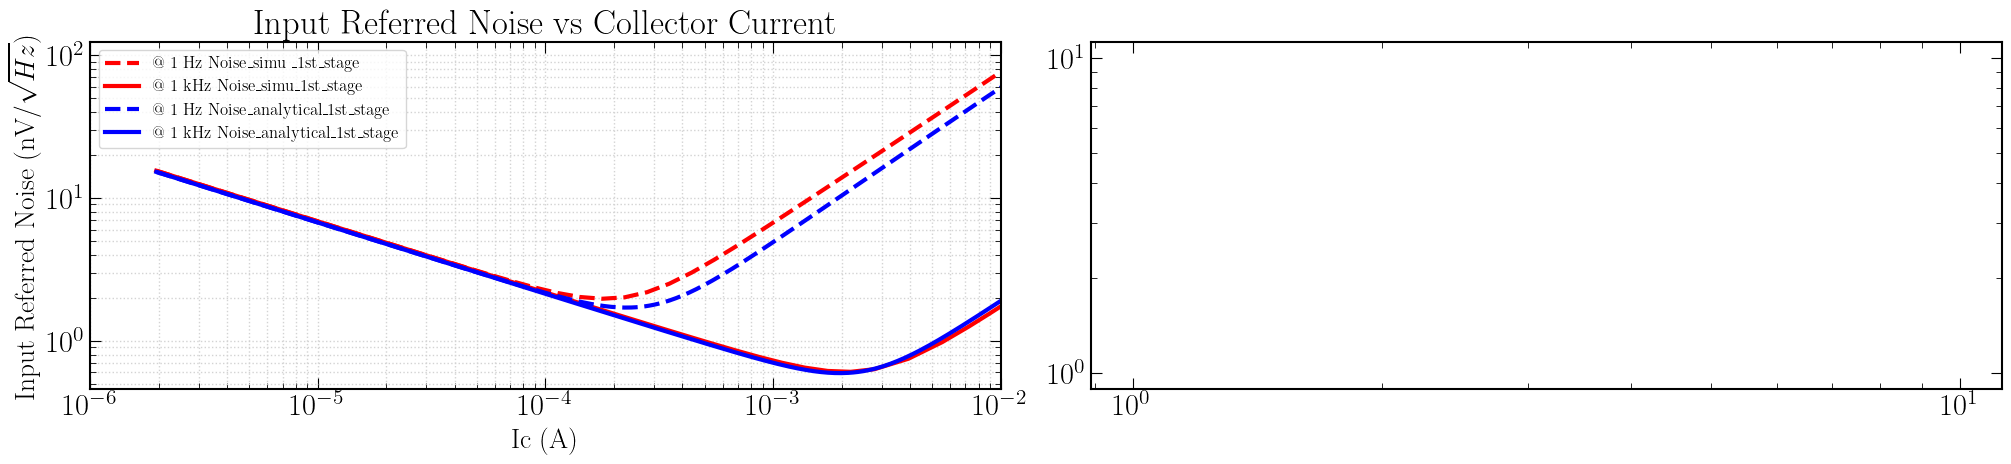

In [9]:
opt_cal1st = pd.read_csv(f"{dir}/optimize_calculate_at_Nx501st.csv")
opt_caltot = pd.read_csv(f"{dir}/optimize_calculate_at_Nx50_tot.csv")
plt.figure(figsize=(20,8), constrained_layout=True)
plt.subplot(221)  
plt.loglog(compare_opt_1stage['Ic'], compare_opt_1stage['Noise_1Hz']*1e9,  color='red', linestyle='--', lw = 3, label = '@ 1 Hz Noise_simu _1st_stage')
plt.loglog(compare_opt_1stage['Ic'], compare_opt_1stage['Noise_1kHz']*1e9, color='red', linestyle='-', lw = 3, label = '@ 1 kHz Noise_simu_1st_stage')
plt.loglog(opt_cal1st['Ic'], opt_cal1st['Noise_1Hz']*1e9,  color='blue', linestyle='--', lw = 3, label = '@ 1 Hz Noise_analytical_1st_stage')
plt.loglog(opt_cal1st['Ic'], opt_cal1st['Noise_1kHz']*1e9, color='blue', linestyle='-', lw = 3, label = '@ 1 kHz Noise_analytical_1st_stage')
plt.xlabel('Ic (A)', fontsize=20)
plt.ylabel('Input Referred Noise (nV/$\sqrt{Hz}$)', fontsize=20)
plt.title('Input Referred Noise vs Collector Current', fontsize=25)
plt.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
plt.legend(fontsize=12)
plt.xlim(1e-6, 1e-2)

# Plot ratio of analytical to simulated noise for 1st stage
plt.subplot(222)
plt.loglog(compare_opt_1stage['Ic'], compare_opt_1stage['Noise_1Hz']/opt_cal1st['Noise_1Hz'], color='green', linestyle='--', lw = 3, label = 'Ratio @ 1 Hz 1st stage')
plt.loglog(compare_opt_1stage['Ic'], compare_opt_1stage['Noise_1kHz']/opt_cal1st['Noise_1kHz'], color='green', linestyle='-', lw = 3, label = 'Ratio @ 1 kHz 1st stage')
plt.xlabel('Ic (A)', fontsize=20)
plt.ylabel('Ratio', fontsize=20)
plt.title('Ratio Simu to Ana Noise (1st Stage)', fontsize=25)
plt.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
plt.legend(fontsize=12)
plt.xlim(1e-6, 1e-2)
#
# plt.tight_layout()
plt.subplot(223)
plt.loglog(compare_opt['Ic'], compare_opt['Noise_1Hz']*1e9, color= 'red', linestyle='--', lw = 3, label = '@ 1 Hz  full circuit')
plt.loglog(compare_opt['Ic'], compare_opt['Noise_1kHz']*1e9, color='red', linestyle='-', lw = 3, label = '@ 1 kHz full circuit') 
plt.loglog(opt_caltot['Ic'], opt_caltot['Noise_1Hz']*1e9,  color='blue', linestyle='--', lw = 3, label = '@ 1 Hz Noise_analytical full circuit')
plt.loglog(opt_caltot['Ic'], opt_caltot['Noise_1kHz']*1e9, color='blue', linestyle='-', lw = 3, label = '@ 1 kHz Noise_analytical full circuit')
plt.xlabel('Ic (A)', fontsize=20)
plt.ylabel('Input Referred Noise (nV/$\sqrt{Hz}$)', fontsize=20)
plt.title('Input Referred Noise vs Collector Current', fontsize=25)
plt.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
plt.legend(fontsize=12)
# plt.ylim(6e-1,1e1)
plt.xlim(1e-6, 1e-2)
# plt.tight_layout()

#plot ratio of analytical to simulated noise for full circuit
plt.subplot(224)
plt.loglog(compare_opt['Ic'], compare_opt['Noise_1Hz']/opt_caltot['Noise_1Hz'], color='green', linestyle='--', lw = 3, label = 'Ratio @ 1 Hz full circuit')
plt.loglog(compare_opt['Ic'], compare_opt['Noise_1kHz']/opt_caltot['Noise_1kHz'], color='green', linestyle='-', lw = 3, label = 'Ratio @ 1 kHz full circuit')
plt.xlabel('Ic (A)', fontsize=20)
plt.ylabel('Ratio', fontsize=20)
plt.title('Ratio Simu to Ana Noise (Full Circuit)', fontsize=25)
plt.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
plt.legend(fontsize=12) 

plt.show()


In [ ]:
#find the noise value at certain frequency 
def find_noise_at_current(target_I, real_I, noise_data):
    for I_target in target_I:
        print(f"Results for Current: {I_target} A")
        
        # Find the closest frequency in the data
        I_diffs = np.abs(real_I - I_target)
        idx = I_diffs.idxmin()
        I_actual = real_I.at[idx]
        print(f"Using actual current from data: {I_actual} A\n")
        print(I_actual/600)
        noise_vals = []
        print(f"Noise at Ic = {np.round(I_actual,4)} A is Sv = {np.round((noise_data.at[idx])**2,20)} V^2/Hz\n")
find_noise_at_current([2e-3],  compare_opt_1stage['Ic'], compare_opt_1stage['Noise_1Hz'])
find_noise_at_current([2e-3],  compare_opt_1stage['Ic'], compare_opt_1stage['Noise_1kHz'])

Results for Current: 0.002 A
Using actual current from data: 0.00219444 A

3.6574000000000003e-06
Noise at Ic = 0.0022 A is Sv = 2.3304e-16 V^2/Hz

Results for Current: 0.002 A
Using actual current from data: 0.00219444 A

3.6574000000000003e-06
Noise at Ic = 0.0022 A is Sv = 3.7e-19 V^2/Hz



In [ ]:
import numpy as np
from scipy.optimize import least_squares
import pandas as pd

# ==========================================
# CONFIGURATION (From your latest image)
# ==========================================
BASE_TERM = 3.6574000000000003e-06
CONST_ADD = 1.0408e-18
RHS_TARGETS = np.array([2.3304e-16, 3.7e-19])
COEFFS = np.array([200**2, (200/1000)**2]) # [40000, 0.04]

def model_func(kf, alpha):
    """Calculates the LHS of both equations given Kf and Alpha."""
    term_variable = kf * (BASE_TERM ** alpha)
    return COEFFS * term_variable + CONST_ADD

def residuals(vars):
    """Calculates relative error for the optimizer."""
    kf, alpha = vars
    # Prevent negative bases or overflows
    if kf < 0: return [1e9, 1e9] 
    
    lhs_calc = model_func(kf, alpha)
    # Weight the error by relative magnitude
    return (lhs_calc - RHS_TARGETS) / RHS_TARGETS

# ==========================================
# TEST 1: MAIN SOLVER
# ==========================================
print(">>> TEST 1: OPTIMIZATION SOLVER")
initial_guess = [6.38e-7, 2.165]
res = least_squares(residuals, initial_guess, loss='soft_l1', ftol=1e-12, xtol=1e-12, gtol=1e-12)

best_kf, best_alpha = res.x
print(f"  Result found: Kf = {best_kf:.4e}, Alpha = {best_alpha:.4f}")
print("-" * 50)

# ==========================================
# TEST 2: RESIDUAL ANALYSIS (Accuracy Test)
# ==========================================
print("\n>>> TEST 2: RESIDUAL ANALYSIS (Accuracy)")
lhs_final = model_func(best_kf, best_alpha)
error_abs = lhs_final - RHS_TARGETS
error_rel = (error_abs / RHS_TARGETS) * 100

df_results = pd.DataFrame({
    'Equation': ['Eq 1 (High Conc)', 'Eq 2 (Low Conc)'],
    'Target RHS': RHS_TARGETS,
    'Calculated LHS': lhs_final,
    'Abs Error': error_abs,
    'Rel Error (%)': error_rel
})
print(df_results.to_string(index=False))
print("-" * 50)

# ==========================================
# TEST 3: STABILITY TEST (Multi-Start)
# ==========================================
print("\n>>> TEST 3: STABILITY INDICATION (Do different guesses give same result?)")
test_guesses = [
    [1.0e-7, 2.0],
    [1.0e-8, 2.5],
    [5.0e-7, 1.5],
    [1.0e-6, 3.0]
]

print(f"{'Start Guess (Kf, Alpha)':<30} | {'Final Result (Kf, Alpha)':<30} | {'Converged?'}")
for guess in test_guesses:
    try:
        r = least_squares(residuals, guess, loss='soft_l1')
        k_res, a_res = r.x
        # Check if it matches our best result within 1%
        match = np.isclose(k_res, best_kf, rtol=0.01) and np.isclose(a_res, best_alpha, rtol=0.01)
        status = "MATCH" if match else "DIFFERENT"
        print(f"{str(guess):<30} | {k_res:.2e}, {a_res:.2f}           | {status}")
    except Exception as e:
        print(f"{str(guess):<30} | FAILED ({str(e)})")
print("-" * 50)

# ==========================================
# TEST 4: LANDSCAPE SCAN (Is it a true minimum?)
# ==========================================
print("\n>>> TEST 4: LOCAL SENSITIVITY SCAN")
# We verify if moving Alpha slightly up or down increases the error (which it should if it's a minimum)
current_cost = np.sum(np.square(residuals([best_kf, best_alpha])))
print(f"  Cost at solution: {current_cost:.4e}")

# Check Alpha +/- 1%
alpha_up = best_alpha * 1.01
cost_up = np.sum(np.square(residuals([best_kf, alpha_up])))
print(f"  Cost at Alpha +1%: {cost_up:.4e} " + ("(Higher -> Good)" if cost_up > current_cost else "(Lower -> WARNING)"))

alpha_down = best_alpha * 0.99
cost_down = np.sum(np.square(residuals([best_kf, alpha_down])))
print(f"  Cost at Alpha -1%: {cost_down:.4e} " + ("(Higher -> Good)" if cost_down > current_cost else "(Lower -> WARNING)"))

print("\nCONCLUSION:")
if df_results.iloc[1]['Rel Error (%)'] < -5.0:
    print("  ! NOTE: Equation 2 has a persistent negative error.")
    print("    This indicates the constant term (1.0408e-18) is already close to the Target (1.11e-18),")
    print("    leaving very little 'room' for the variable term to fit perfectly.")
else:
    print("  Solution appears robust and consistent.")

>>> TEST 1: OPTIMIZATION SOLVER
  Result found: Kf = 3.4191e-09, Alpha = 2.1650
--------------------------------------------------

>>> TEST 2: RESIDUAL ANALYSIS (Accuracy)
        Equation   Target RHS  Calculated LHS     Abs Error  Rel Error (%)
Eq 1 (High Conc) 2.330400e-16    2.329115e-16 -1.285332e-19      -0.055155
 Eq 2 (Low Conc) 3.700000e-19    1.041032e-18  6.710319e-19     181.359965
--------------------------------------------------

>>> TEST 3: STABILITY INDICATION (Do different guesses give same result?)
Start Guess (Kf, Alpha)        | Final Result (Kf, Alpha)       | Converged?
[1e-07, 2.0]                   | 3.14e-09, 2.00           | DIFFERENT
[1e-08, 2.5]                   | 2.17e-07, 2.50           | DIFFERENT
[5e-07, 1.5]                   | 8.26e-09, 1.50           | DIFFERENT
[1e-06, 3.0]                   | 2.54e-03, 3.24           | DIFFERENT
--------------------------------------------------

>>> TEST 4: LOCAL SENSITIVITY SCAN
  Cost at solution: 3.2891e+00
 

### Mismatch due to resistor (schema level simulation)

In [ ]:
# noise_Rvar = pd.read_csv(f"{dir}/noise_Rvaries_schematic_res.csv")
noise_Rvar = pd.read_csv(f"{dir}/noise_Rvaries_schematic_res1.csv")
# dR = np.arange(-10,10.5,0.5) #for first file 
dR = np.arange(0,116,1) #for second file
col = ['f']
for i in range(len(dR)):
    col.append(f"noise{i}")
noise_Rvar.columns = col
noise_Rvar.head()
# #test plot 
# plt.figure(figsize=(10,6))
# plt.loglog(noise_Rvar['f'], noise_Rvar[f"noise40"], label=f"dR=10 Ohm")

,f,noise0,noise1,noise2,noise3,noise4,noise5,noise6,noise7,noise8,...,noise106,noise107,noise108,noise109,noise110,noise111,noise112,noise113,noise114,noise115
0,1.00000,4.895110e-09,4.949620e-09,5.110150e-09,5.367040e-09,5.707190e-09,6.116600e-09,6.582250e-09,7.092980e-09,7.639650e-09,...,7.625600e-08,7.695590e-08,7.765560e-08,7.835500e-08,7.905410e-08,7.975300e-08,8.045150e-08,8.114980e-08,8.184780e-08,8.254550e-08
1,1.25893,4.360020e-09,4.406960e-09,4.545300e-09,4.766980e-09,5.060950e-09,5.415350e-09,5.819060e-09,6.262460e-09,6.737630e-09,...,6.678890e-08,6.740180e-08,6.801460e-08,6.862700e-08,6.923930e-08,6.985130e-08,7.046300e-08,7.107460e-08,7.168580e-08,7.229690e-08
2,1.58489,3.890220e-09,3.930570e-09,4.049590e-09,4.240580e-09,4.494260e-09,4.800630e-09,5.150210e-09,5.534750e-09,5.947390e-09,...,5.849770e-08,5.903450e-08,5.957110e-08,6.010740e-08,6.064360e-08,6.117950e-08,6.171530e-08,6.225080e-08,6.278610e-08,6.332120e-08
3,1.99526,3.478460e-09,3.513070e-09,3.615270e-09,3.779480e-09,3.998000e-09,4.262410e-09,4.564670e-09,4.897710e-09,5.255620e-09,...,5.123640e-08,5.170650e-08,5.217640e-08,5.264610e-08,5.311560e-08,5.358500e-08,5.405410e-08,5.452310e-08,5.499180e-08,5.546040e-08
4,2.51189,3.118350e-09,3.147960e-09,3.235480e-09,3.376340e-09,3.564150e-09,3.791880e-09,4.052750e-09,4.340720e-09,4.650710e-09,...,4.487730e-08,4.528890e-08,4.570040e-08,4.611170e-08,4.652280e-08,4.693380e-08,4.734470e-08,4.775540e-08,4.816590e-08,4.857620e-08


Results for Frequency: 1 Hz
Using actual frequency from data: 1.0 Hz

dR/R (%)     Noise (nV/√Hz)      
0.000        4.90                
0.044        4.95                
0.087        5.11                
0.131        5.37                
0.175        5.71                
0.218        6.12                
0.262        6.58                
0.306        7.09                
0.349        7.64                
0.393        8.22                
0.437        8.81                
0.480        9.43                
0.524        10.06               
0.568        10.71               
0.611        11.36               
0.655        12.02               
0.699        12.69               
0.742        13.37               
0.786        14.05               
0.830        14.74               
0.873        15.43               
0.917        16.12               
0.961        16.81               
1.004        17.51               
1.048        18.21               
1.092        18.91               
1.135       

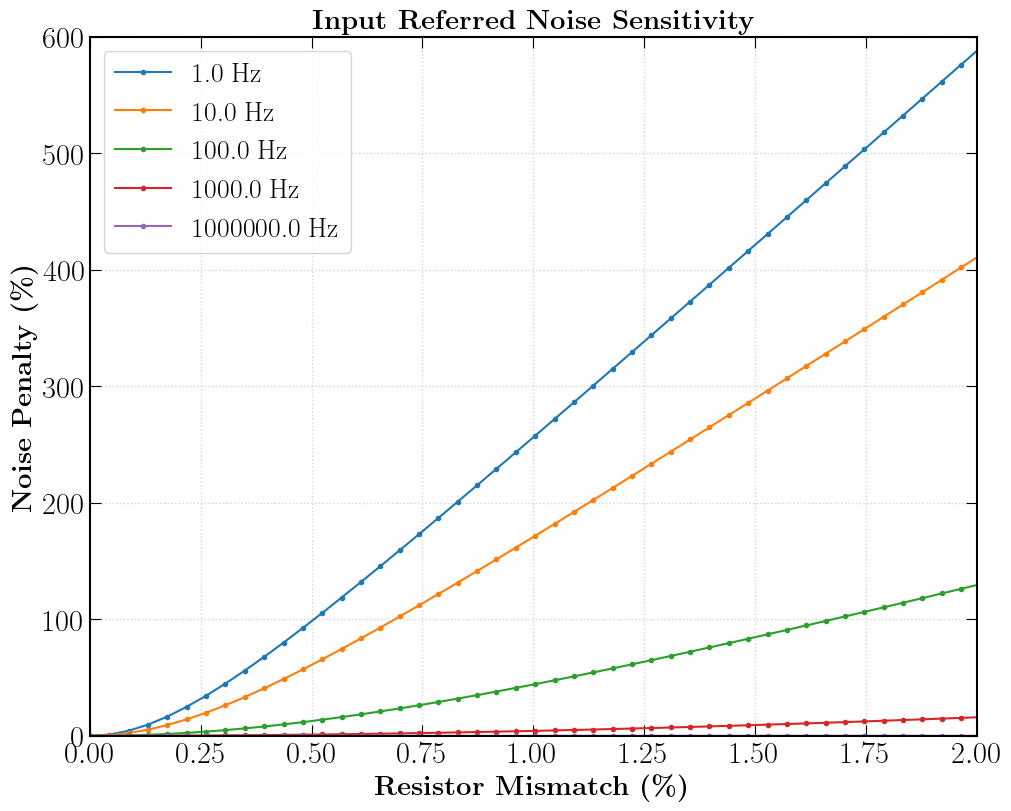

In [ ]:
# target frequency points
target_freqs = [1, 10, 1e2, 1e3, 1e6]  # e.g., 1kHz, 10kHz, 100kHz     
plt.figure(figsize=(10,8), layout = 'constrained')  
for f_target in target_freqs:
    print(f"Results for Frequency: {f_target} Hz")
    # Find the closest frequency in the data
    freq_diffs = np.abs(noise_Rvar['f'] - f_target)
    idx = freq_diffs.idxmin()
    f_actual = noise_Rvar.at[idx, 'f']
    print(f"Using actual frequency from data: {f_actual} Hz\n")
    
    print(f"{'dR/R (%)':<12} {'Noise (nV/√Hz)':<20}")
    noise_vals = []
    for i, dR_value in enumerate(dR):
        noise_value = noise_Rvar.at[idx, f"noise{i}"]
        noise_vals.append(noise_value*1e9)  # Convert to nV/√Hz
          # Mismatch percentage
        # print(f"{dR_value:<12} {noise_value*1e9:<20.2f}")
        print(f"{dR_value*100/2290:<12.3f} {noise_value*1e9:<20.2f}")
    print("\n")
    # 
    # 1. Calculate the gaps
    # dy = np.diff(noise_vals)
    # dx = np.diff(dR*100/2290)  # Mismatch percentage

    # # 2. Calculate slope (dy/dx)
    # # This array has size N-1
    # slope_interval = dy / dx 

    # # 3. Force 0 at the start (Prepend)
    # # This brings size back to N
    # slope_plot = np.insert(slope_interval, 0, 0)                        
    # plt.plot(dR*100/2290, noise_vals/min(noise_vals), marker='.', linestyle='-', label=f'{f_actual} Hz')
    plt.plot(dR*100/2290, (noise_vals-min(noise_vals))*100/min(noise_vals), marker='.', linestyle='-', label=f'{f_actual} Hz')
    # plt.plot(dR*100/2290, slope_plot, marker='.', linestyle='-', label=f'{f_actual} Hz')
plt.title( r'\textbf{Input Referred Noise Sensitivity}', fontsize=20, fontweight='bold')
plt.xlabel(r'\textbf{Resistor Mismatch (\%)}', fontsize=20)
plt.ylabel(r'\textbf{Noise Penalty (\%)}', fontsize=20)
plt.grid(True, linestyle=':', linewidth=1, color='lightgray')
plt.legend(fontsize=20)
plt.xlim(0,2)
plt.ylim(0,600)
plt.savefig(f"{plot_dir}/noise_sensitivity.png", dpi=300)
# plt.ylim(0,7)
    # plt.tight_layout()
    # noise_Rvar[f'mismatch_{f_target}Hz'] = noise_vals
    # Plotting the noise vs dR for this frequency
    # plt.figure(figsize=(10,6))
    # plt.plot(dR/2290, noise_vals, marker='o', linestyle='-', color='skyblue')
    # plt.title(f'Input Referred Noise vs dR at {f_actual} Hz', fontsize=16)
    # plt.xlabel(r'\textbf{Mismatch percentages (\%)}', fontsize=20)
    # plt.ylabel(r'\textbf{Voltage Density} $\boldsymbol{\sqrt{S_v} [nV/ \sqrt{Hz}]}$', fontsize=20)
    # plt.grid(True, linestyle=':', linewidth=1, color='lightgray')
    # plt.tight_layout()
    # # plt.savefig(f"{plot_dir}/Noise_vs_dR_Freq{int(f_actual)}Hz.png", dpi=300)
    # # plt.close()       

In [ ]:

? np.diff

Signature:        np.diff(a, n=1, axis=-1, prepend=<no value>, append=<no value>)
Call signature:   np.diff(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function diff at 0x108949ee0>
File:            ~/Downloads/PhD_APC/mission/2025/R-T_BiCMOS_run/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py
Docstring:      
Calculate the n-th discrete difference along the given axis.

The first difference is given by ``out[i] = a[i+1] - a[i]`` along
the given axis, higher differences are calculated by using `diff`
recursively.

Parameters
----------
a : array_like
    Input array
n : int, optional
    The number of times values are differenced. If zero, the input
    is returned as-is.
axis : int, optional
    The axis along which the difference is taken, default is the
    last axis.
prepend, append : array_like, optional
    Values to prepend or append to `a` along axis prior to
    performing the difference.  Scalar values are expanded to
    a

### Input noise MC 

In [ ]:
#noise at 27 deg C
noise_LNA1 = pd.read_csv(f"{dir}/Noise_MC_LNA1_27degC.csv")
noise_LNA2 = pd.read_csv(f"{dir}/Noise_MC_LNA2_27degC.csv")
noise_LNA1.head()
#noise at 45 deg C 
noise_LNA1_45 = pd.read_csv(f"{dir}/Noise_MC_LNA1_45degC.csv")
noise_LNA2_45 = pd.read_csv(f"{dir}/Noise_MC_LNA2_45degC.csv")
np.size(noise_LNA1_45,axis=1)
# More MC point 
# noise_LNA1 = pd.read_csv(f"{dir}/Noise_MC_100LNA1_27degC.csv")


61

In [ ]:
np.size(noise_LNA1,axis = 0)
# noise_LNA1.head()

Vcm = [-0.5,0,0.5]  # For Vcm = -0.5, 0.0 and 0.5 V
num_sim = int((np.size(noise_LNA2, axis = 1)-4)/len(Vcm))  # Number of MC simulation for each Vcm
col1 = ['f']
col2 = ['f']
for i in Vcm: 
    for j in range(num_sim):
        col1.append(f'LNA1_Vcm{str(i)}_MC{j+1}')
        col2.append(f'LNA2_Vcm{str(i)}_MC{j+1}')
#append data for 45 deg C first since no current data there
noise_LNA1_45.columns = col1
noise_LNA2_45.columns = col2
noise_LNA1_45 = noise_LNA1_45.apply(pd.to_numeric, errors='coerce')
noise_LNA2_45 = noise_LNA2_45.apply(pd.to_numeric, errors='coerce')
#col for the current 
col1.append('MCnumber')
col2.append('MCnumber')

for i in Vcm:
    col1.append(f'i_LNA1_Vcm{i}_MC')
    col2.append(f'i_LNA1_Vcm{i}_MC')
noise_LNA1.columns = col1
noise_LNA2.columns = col2   
noise_LNA1 = noise_LNA1.apply(pd.to_numeric, errors='coerce')
noise_LNA2 = noise_LNA2.apply(pd.to_numeric, errors='coerce')
# noise_LNA1.head()
#calculate real noise 
for i in Vcm:
    for j in range(num_sim):
        noise_LNA1[f'Real_LNA1_Vcm{str(i)}_MC{j+1}'] = (noise_LNA1[f'LNA1_Vcm{str(i)}_MC{j+1}']**2 - (noise_LNA1[f'i_LNA1_Vcm{i}_MC']**2 * 100**2))**0.5
        noise_LNA2[f'Real_LNA2_Vcm{str(i)}_MC{j+1}'] = (noise_LNA2[f'LNA2_Vcm{str(i)}_MC{j+1}']**2 - (noise_LNA2[f'i_LNA1_Vcm{i}_MC']**2 * 100**2))**0.5

In [ ]:
print(noise_LNA1['Real_LNA1_Vcm0_MC1'])

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
86   NaN
87   NaN
88   NaN
89   NaN
90   NaN
Name: Real_LNA1_Vcm0_MC1, Length: 91, dtype: float64


In [ ]:
# #noise at 27 deg C
# noise_LNA1 = pd.read_csv(f"{dir}/Noise_MC_LNA1_27degC.csv")
# noise_LNA2 = pd.read_csv(f"{dir}/Noise_MC_LNA2_27degC.csv")
# noise_LNA1.head()
# #noise at 45 deg C 
# noise_LNA1_45 = pd.read_csv(f"{dir}/Noise_MC_LNA1_45degC.csv")
# noise_LNA2_45 = pd.read_csv(f"{dir}/Noise_MC_LNA2_45degC.csv")
# np.size(noise_LNA1_45,axis=1)
# Vcm = [-0.5,0,0.5]  # For Vcm = -0.5, 0.0 and 0.5 V
# num_sim = int((np.size(noise_LNA2, axis = 1)-4)/len(Vcm))  # Number of MC simulation for each Vcm
# col1 = ['f']
# col2 = ['f']
# for i in Vcm: 
#     for j in range(num_sim):
#         col1.append(f'LNA1_Vcm{str(i)}_MC{j+1}')
#         col2.append(f'LNA2_Vcm{str(i)}_MC{j+1}')
# #append data for 45 deg C first since no current data there
# noise_LNA1_45.columns = col1
# noise_LNA2_45.columns = col2
# noise_LNA1_45 = noise_LNA1_45.apply(pd.to_numeric, errors='coerce')
# noise_LNA2_45 = noise_LNA2_45.apply(pd.to_numeric, errors='coerce')
# #col for the current 
# col1.append('MCnumber')
# col2.append('MCnumber')

# for i in Vcm:
#     col1.append(f'i_LNA1_Vcm{i}_MC')
#     col2.append(f'i_LNA1_Vcm{i}_MC')
# noise_LNA1.columns = col1
# noise_LNA2.columns = col2   
# noise_LNA1 = noise_LNA1.apply(pd.to_numeric, errors='coerce')
# noise_LNA2 = noise_LNA2.apply(pd.to_numeric, errors='coerce')
# # noise_LNA1.head()
# #calculate real noise 
# for i in Vcm:
#     for j in range(num_sim):
#         noise_LNA1[f'Real_LNA1_Vcm{str(i)}_MC{j+1}'] = (noise_LNA1[f'LNA1_Vcm{str(i)}_MC{j+1}']**2 - (noise_LNA1[f'i_LNA1_Vcm{i}_MC']**2 * 100**2))**0.5
#         noise_LNA2[f'Real_LNA2_Vcm{str(i)}_MC{j+1}'] = (noise_LNA2[f'LNA2_Vcm{str(i)}_MC{j+1}']**2 - (noise_LNA2[f'i_LNA1_Vcm{i}_MC']**2 * 100**2))**0.5

# Vcm = [0] # Can be extended to other Vcm values as needed [-0.5,0,0.5]
# # --- 1. SETUP: Define your frequencies here ---
# # You can put as many as you want in this list
# target_freqs = [1, 1e3, 1e6]  # e.g., 1kHz, 10kHz, 100kHz

# # Organize data
# LNA = {'LNA1': noise_LNA1, 'LNA2': noise_LNA2}

# # --- 2. PRE-CALCULATION: Find indices for all frequencies ---
# # We assume both DataFrames share the same frequency vector.
# # We create a list of tuples: (target_freq, actual_index, actual_freq_value)
# freq_points = []
# ref_freq_col = noise_LNA1['f'] # Reference column
# print("------- T = 27 deg C -------")
# print("--- Frequency Check ---")
# for f_target in target_freqs:
#     # Find index of closest frequency
#     idx = (np.abs(ref_freq_col - f_target)).argmin()
#     actual_f = ref_freq_col.iloc[idx]
#     freq_points.append( (f_target, idx, actual_f) )
#     print(f"Target: {f_target:.0f} Hz -> Found: {actual_f:.2f} Hz (Index: {idx})")
# print("-----------------------\n")

# # --- 3. MAIN LOOP ---
# # Iterate through each LNA DataFrame
# for lna_name, df in LNA.items(): 
#     print(f"RESULTS FOR {lna_name}")
#     print("=" * 30)
    
#     for i in Vcm:
#         print(f'>> Vcm = {i} V')
        
#         # Filter columns dynamically based on the current LNA name and Vcm
#         # Note: We use 'df' here, not 'noise_LNA1', so it works for LNA2 too
#         subset = df.filter(like=f'{lna_name}_Vcm{i}_MC')
        
#         # Force numeric conversion to prevent string errors
#         subset = subset.apply(pd.to_numeric, errors='coerce')

#         # Calculate the statistic curves (entire frequency range)
#         avg_curve = subset.mean(axis=1)
#         max_curve = subset.max(axis=1)
#         min_curve = subset.min(axis=1)
        
#         # Extract specific points for our target frequencies
#         # We allow for a small header row to make it readable
#         print(f"{'Freq (Hz)':<12} {'Avg (nV)':<12} {'Min (nV)':<12} {'Max (nV)':<12}")
#         print("-" * 50)
        
#         for f_target, idx, f_actual in freq_points:
#             # Scale to nV (1e9) for display
#             avg_val = avg_curve.iloc[idx] * 1e9
#             max_val = max_curve.iloc[idx] * 1e9
#             min_val = min_curve.iloc[idx] * 1e9
            
#             print(f"{f_actual:<12.1f} {avg_val:<12.2f} {min_val:<12.2f} {max_val:<12.2f}")
        
#         #plotting the histogram for the last frequency point
#             plt.figure(figsize=(8,8))
#             plt.hist(subset.iloc[idx]*1e9, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
#             plt.title(f'Histogram of {lna_name} Noise at {f_actual:.1f} Hz, Vcm={i} V', fontsize=16)
#             plt.xlabel(r'\textbf{Voltage Density $[nV\sqrt{Hz}]$}', fontsize=20)
#             plt.ylabel(r'\textbf{Count}', fontsize=20)
#             plt.grid(axis='y', alpha=0.75)
#             plt.tight_layout()
#             # plt.savefig(f"{plot_dir}/Histogram_{lna_name}_Vcm{i}_Freq{int(f_actual)}Hz.png", dpi=300)
#             # plt.close()
#         print("") # Empty line between Vcm groups
#     print("\n") # Empty line between LNA groups

In [ ]:
from IPython.display import clear_output

noise_LNA1_27 = pd.read_csv(f"{dir}/Noise_MC_100LNA1_27degC.csv")
noise_LNA2_27 = pd.read_csv(f"{dir}/Noise_MC_100LNA2_27degC.csv")
# noise_LNA2_27.head()

def set_up_file(file, vcm_list):
    Vcm = vcm_list  # For Vcm = -0.5, 0.0 and 0.5 V
    # file.head()
    print(f"Input: {len(Vcm)} Vcm values")
    num_sim = int((np.size(file, axis = 1)-1)/len(Vcm))  # Number of MC simulation for each Vcm
    print(f"Detected {num_sim} MC simulations per Vcm")
    col = ['f']
    
    for i in Vcm: 
        # clear_output(wait=True)
        print(f"Processing Vcm = {i} V")
        for j in range(num_sim):
            clear_output(wait=True)
            print(f" - Adding column for MC{j+1}")
            col.append(f'LNA1_Vcm{str(i)}_MC{j+1}')
    
    file.columns = col
    file = file.apply(pd.to_numeric, errors='coerce')
    return file
def find_noise_at_freq(file, target_freqs):
    freq_points = []
    ref_freq_col = file['f'] # Reference column
    print("------- Frequency Check -------")
    for f_target in target_freqs:
        # Find index of closest frequency
        idx = (np.abs(ref_freq_col - f_target)).argmin()
        actual_f = ref_freq_col.iloc[idx]
        freq_points.append( (f_target, idx, actual_f) )
        print(f"Target: {f_target:.0f} Hz -> Found: {actual_f:.2f} Hz (Index: {idx})")
    print("-----------------------\n")   
    print("------- Noise Results -------")
    print("--- Frequency Noise Values ---")
    noise_LNA1 = []
    noise_LNA2 = []
    for f_target, idx, f_actual in freq_points:
        noise_value_LNA1 = file.at[idx, 'LNA1'] * 1e9  # Convert to nV/√Hz
        noise_LNA1.append(noise_value_LNA1)
        noise_value_LNA2 = file.at[idx, 'LNA2'] * 1e9  # Convert to nV/√Hz
        noise_LNA2.append(noise_value_LNA2)
        print(f"Frequency: {actual_f:.2f} Hz | LNA1 Noise: {noise_value_LNA1:.2f} nV/√Hz | LNA2 Noise: {noise_value_LNA2:.2f} nV/√Hz")
    return noise_LNA1, noise_LNA2

noise_LNA2_27 = set_up_file(noise_LNA2_27, [0])
noise_LNA1_27 = set_up_file(noise_LNA1_27, [0])

 - Adding column for MC100


In [ ]:
noise_LNA1_27.head()

,f,LNA1_Vcm0_MC1,LNA1_Vcm0_MC2,LNA1_Vcm0_MC3,LNA1_Vcm0_MC4,LNA1_Vcm0_MC5,LNA1_Vcm0_MC6,LNA1_Vcm0_MC7,LNA1_Vcm0_MC8,LNA1_Vcm0_MC9,...,LNA1_Vcm0_MC91,LNA1_Vcm0_MC92,LNA1_Vcm0_MC93,LNA1_Vcm0_MC94,LNA1_Vcm0_MC95,LNA1_Vcm0_MC96,LNA1_Vcm0_MC97,LNA1_Vcm0_MC98,LNA1_Vcm0_MC99,LNA1_Vcm0_MC100
0,1.00000,9.692180e-09,1.483200e-08,1.415900e-08,1.283770e-08,6.602250e-09,2.256970e-08,1.113680e-08,5.567020e-09,7.707120e-09,...,1.915210e-08,1.439250e-08,1.050230e-08,2.340800e-08,6.345970e-09,2.061150e-08,1.264010e-08,6.776470e-09,6.306940e-09,1.059720e-08
1,1.25893,8.529990e-09,1.301460e-08,1.242770e-08,1.127080e-08,5.832420e-09,1.978240e-08,9.788270e-09,4.940130e-09,6.800220e-09,...,1.679120e-08,1.262970e-08,9.240500e-09,2.051570e-08,5.611220e-09,1.806840e-08,1.109980e-08,5.988030e-09,5.575740e-09,9.317700e-09
2,1.58489,7.511640e-09,1.142290e-08,1.091140e-08,9.898770e-09,5.158620e-09,1.734130e-08,8.607160e-09,4.390800e-09,6.005460e-09,...,1.472390e-08,1.108600e-08,8.134590e-09,1.798270e-08,4.967670e-09,1.584120e-08,9.750880e-09,5.297290e-09,4.935700e-09,8.196910e-09
3,1.99526,6.619810e-09,1.002930e-08,9.583930e-09,8.697720e-09,4.569520e-09,1.520380e-08,7.573110e-09,3.910120e-09,5.309540e-09,...,1.291390e-08,9.734550e-09,7.165800e-09,1.576460e-08,4.404670e-09,1.389110e-08,8.569910e-09,4.692790e-09,4.376120e-09,7.215570e-09
4,2.51189,5.839340e-09,8.809490e-09,8.422100e-09,7.646820e-09,4.055240e-09,1.333220e-08,6.668310e-09,3.490270e-09,4.700840e-09,...,1.132960e-08,8.551750e-09,6.317690e-09,1.382250e-08,3.912880e-09,1.218380e-08,7.536460e-09,4.164460e-09,3.887670e-09,6.356840e-09


------- T = 27 deg C -------
--- Frequency Check ---
Target: 1 Hz -> Found: 1.00 Hz (Index: 0)
Target: 10 Hz -> Found: 10.00 Hz (Index: 10)
Target: 100 Hz -> Found: 100.00 Hz (Index: 20)
Target: 1000 Hz -> Found: 1000.00 Hz (Index: 30)
Target: 1000000 Hz -> Found: 1000000.00 Hz (Index: 60)
-----------------------

RESULTS FOR LNA1
>> Vcm = 0 V
100
Freq (Hz)    Avg (nV)     Min (nV)     Max (nV)    
--------------------------------------------------
------- Frequency Check -------
Target: 1 Hz -> Found: 1.00 Hz (Index: 0)
-----------------------

------- Noise Results -------
--- Frequency Noise Values ---
Frequency: 1.00 Hz | LNA1 Noise: 4.90 nV/√Hz | LNA2 Noise: 4.16 nV/√Hz
------- Frequency Check -------
Target: 10 Hz -> Found: 10.00 Hz (Index: 10)
-----------------------

------- Noise Results -------
--- Frequency Noise Values ---
Frequency: 10.00 Hz | LNA1 Noise: 1.77 nV/√Hz | LNA2 Noise: 1.55 nV/√Hz
------- Frequency Check -------
Target: 100 Hz -> Found: 100.00 Hz (Index: 20)
--

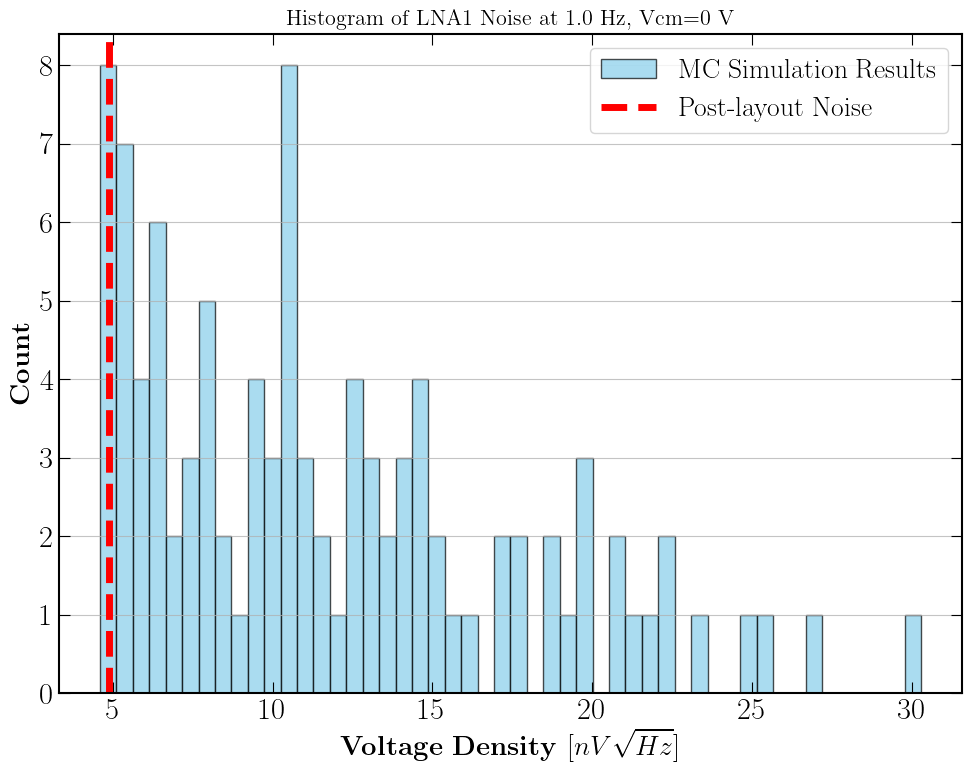

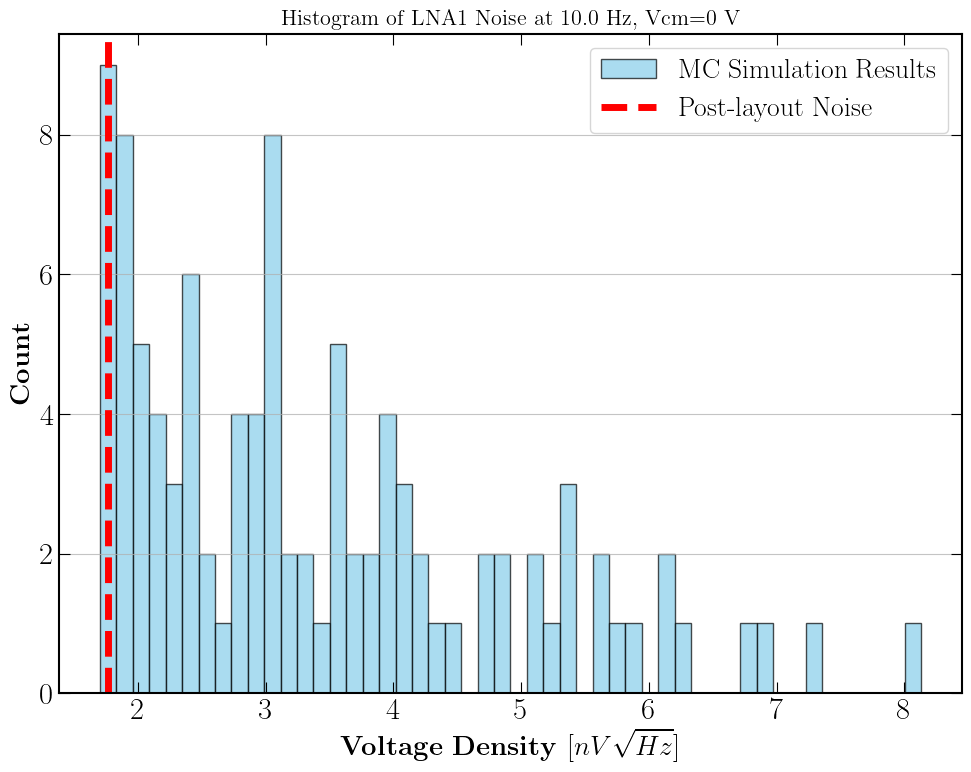

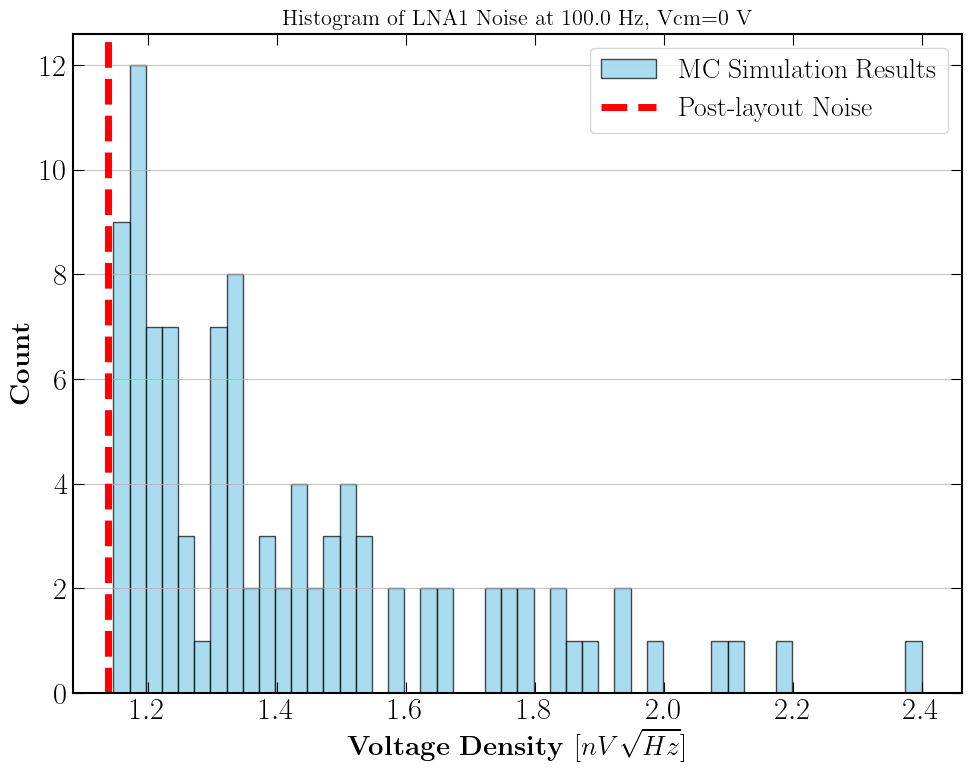

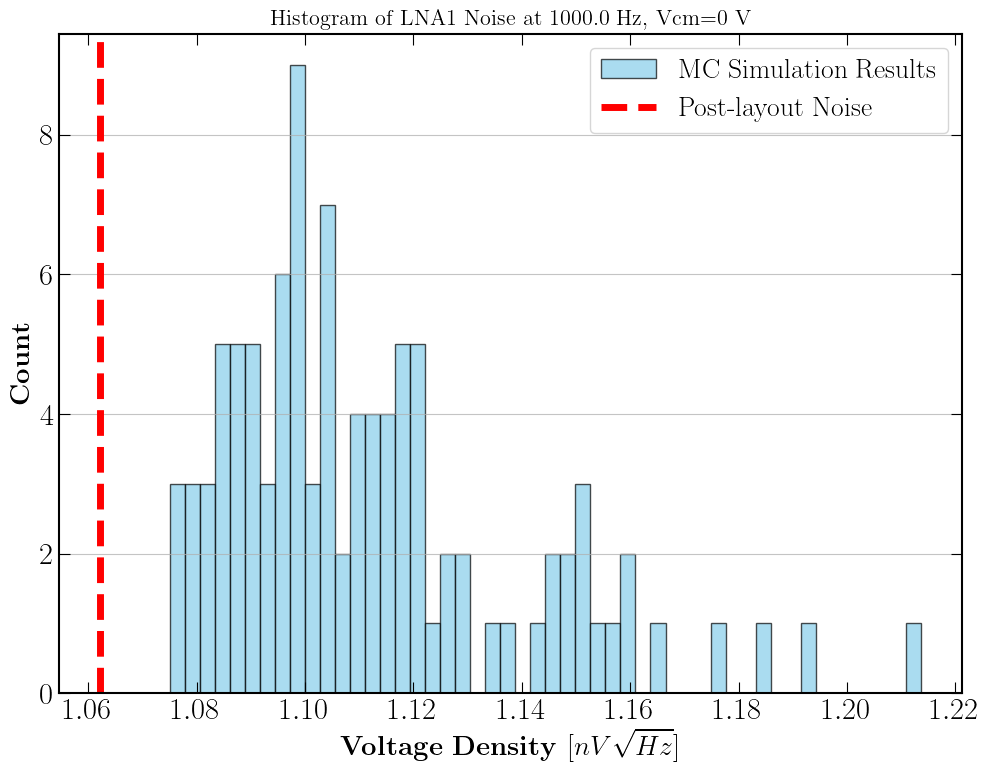

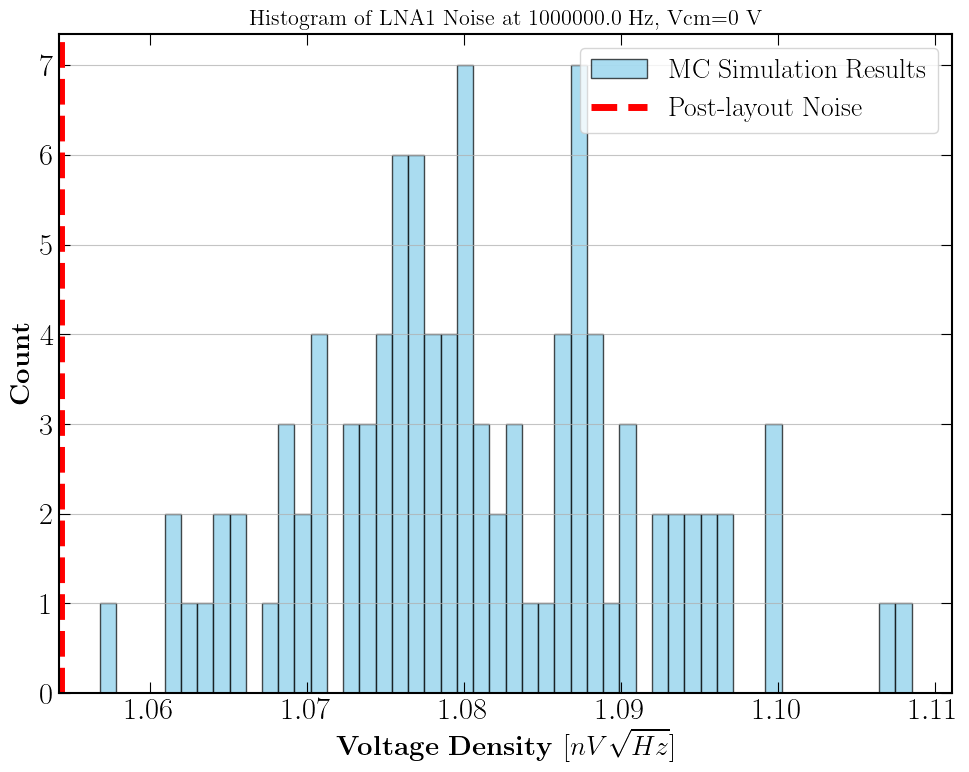

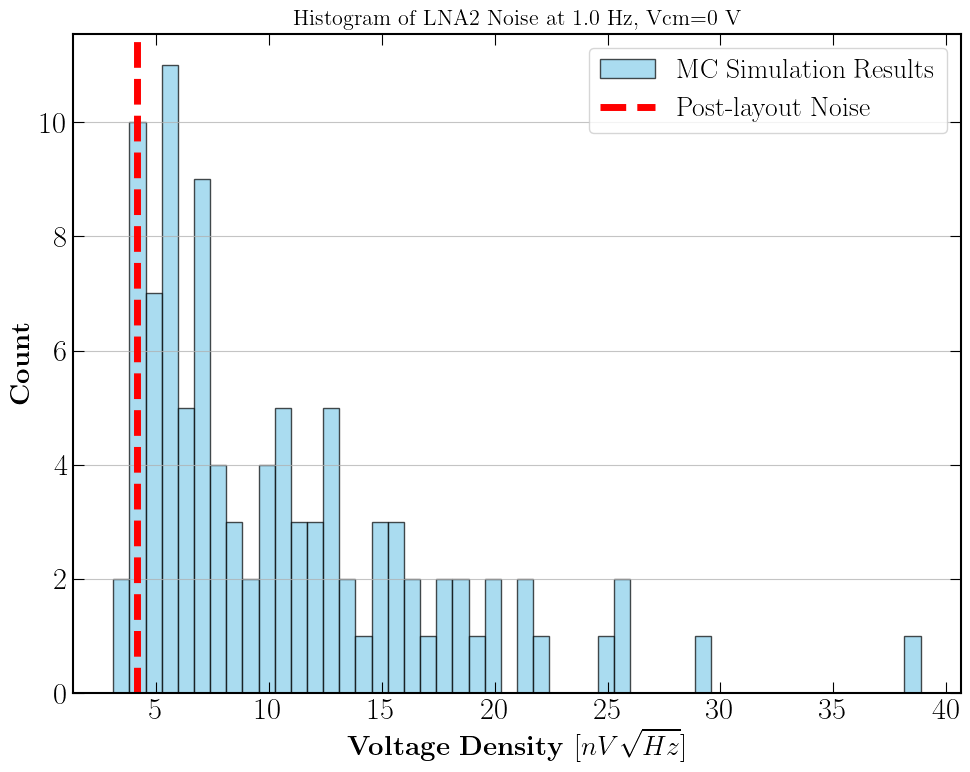

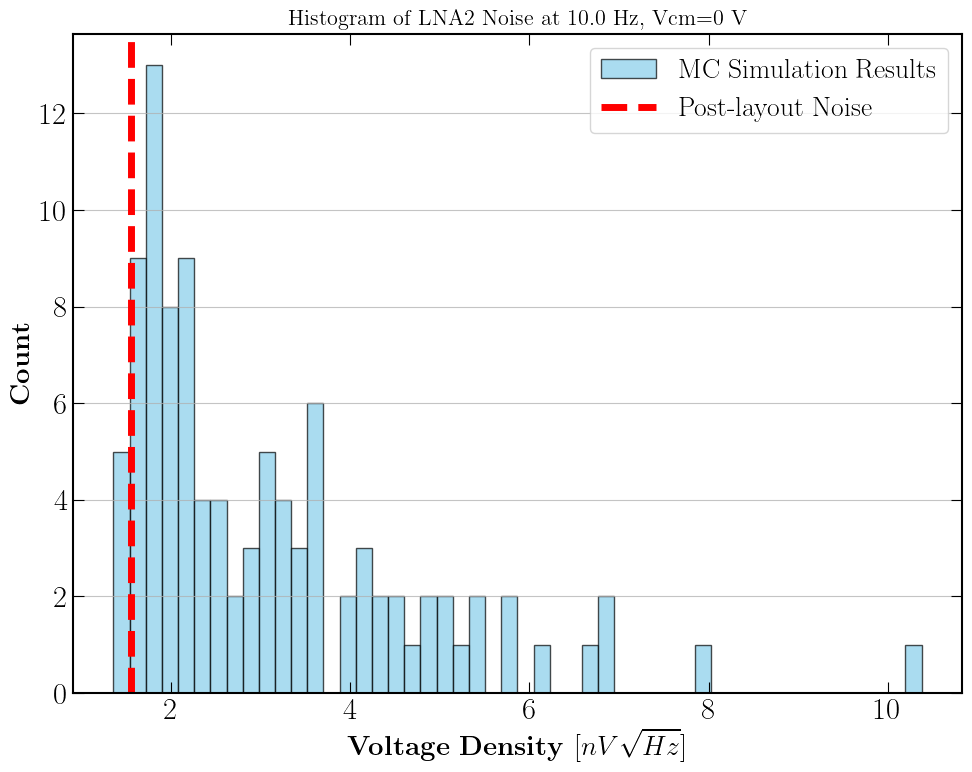

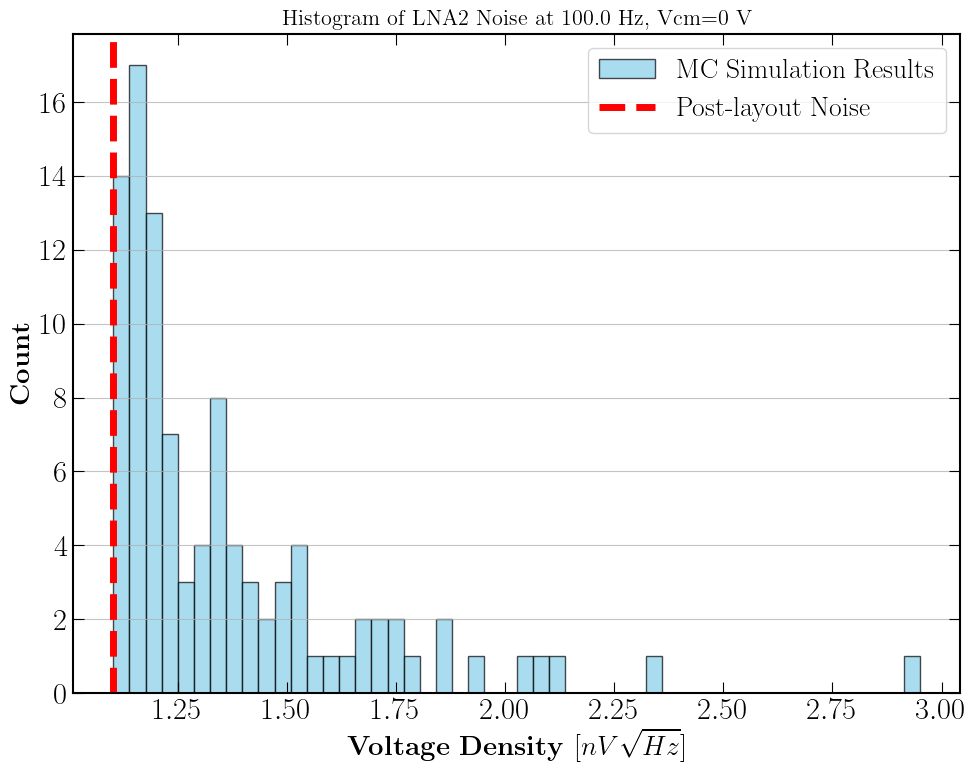

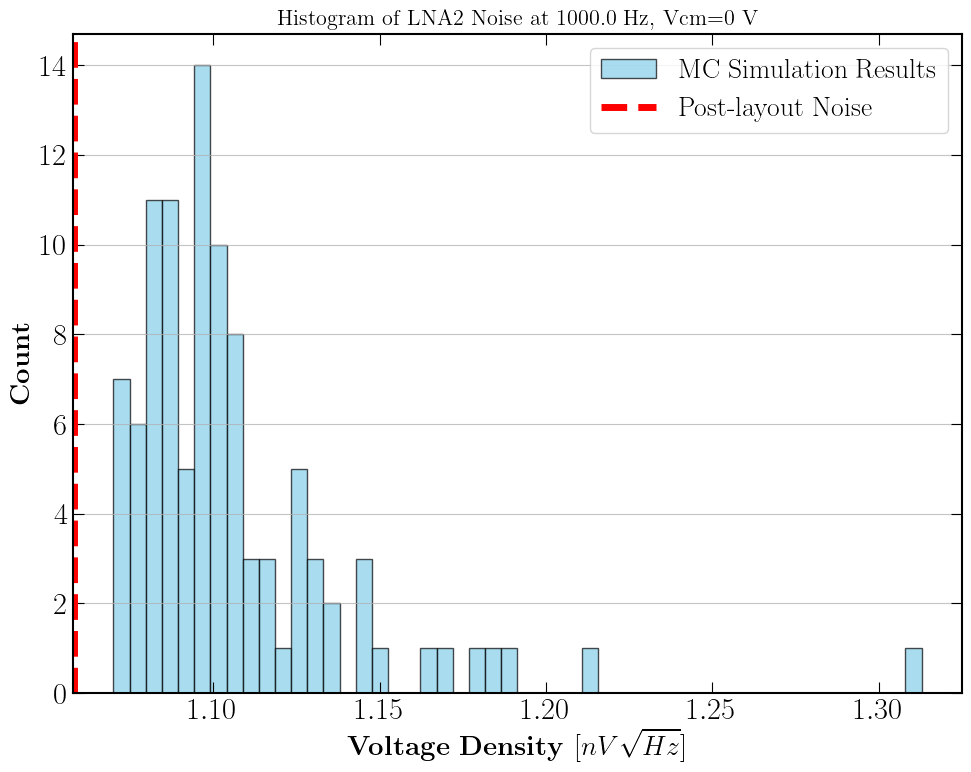

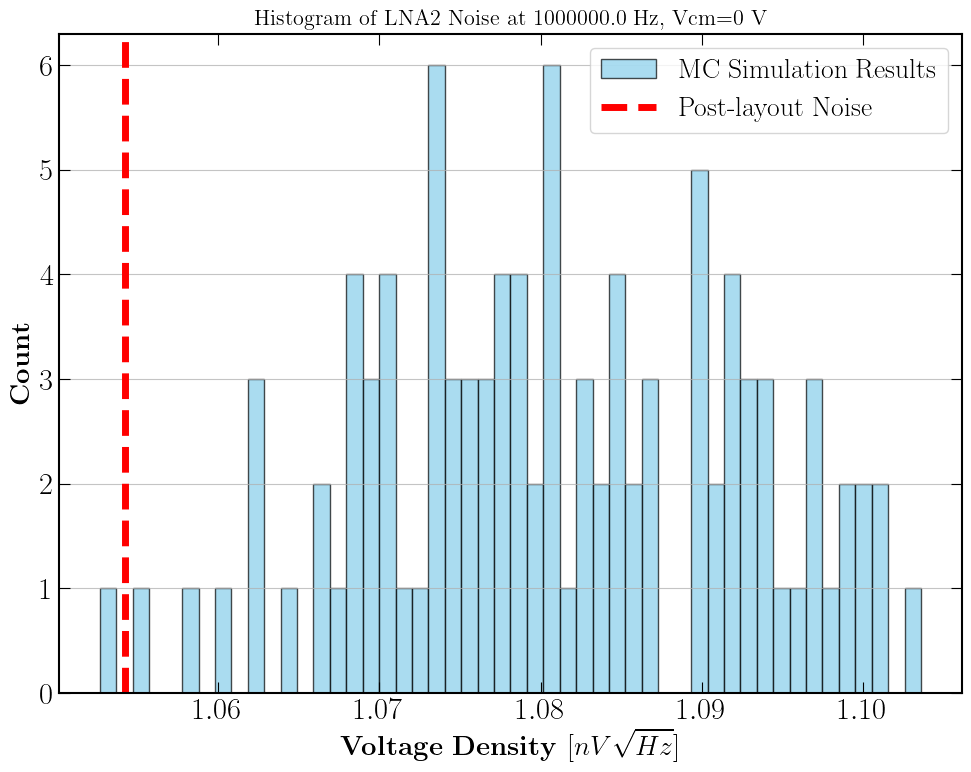

In [ ]:

LNA = {'LNA1': noise_LNA1_27, 'LNA2': noise_LNA2_27}
Vcm = [0]
# --- 2. PRE-CALCULATION: Find indices for all frequencies ---
# We assume both DataFrames share the same frequency vector.
# We create a list of tuples: (target_freq, actual_index, actual_freq_value)
freq_points = []
ref_freq_col = noise_LNA1['f'] # Reference column
print("------- T = 27 deg C -------")
print("--- Frequency Check ---")
for f_target in target_freqs:
    # Find index of closest frequency
    idx = (np.abs(ref_freq_col - f_target)).argmin()
    actual_f = ref_freq_col.iloc[idx]
    freq_points.append( (f_target, idx, actual_f) )
    print(f"Target: {f_target:.0f} Hz -> Found: {actual_f:.2f} Hz (Index: {idx})")
print("-----------------------\n")

# --- 3. MAIN LOOP ---
# Iterate through each LNA DataFrame
for lna_name, df in LNA.items(): 
    print(f"RESULTS FOR {lna_name}")
    print("=" * 30)
    
    for i in Vcm:
        print(f'>> Vcm = {i} V')

    
        # Filter columns dynamically based on the current LNA name and Vcm
        # Note: We use 'df' here, not 'noise_LNA1', so it works for LNA2 too
        subset = df.filter(like=f'MC')
        print(np.size(subset, axis=1))
        # Force numeric conversion to prevent string errors
        subset = subset.apply(pd.to_numeric, errors='coerce')

        # Calculate the statistic curves (entire frequency range)
        avg_curve = subset.mean(axis=1)
        max_curve = subset.max(axis=1)
        min_curve = subset.min(axis=1)
        
        # Extract specific points for our target frequencies
        # We allow for a small header row to make it readable
        print(f"{'Freq (Hz)':<12} {'Avg (nV)':<12} {'Min (nV)':<12} {'Max (nV)':<12}")
        print("-" * 50)
        # print(f"Preparing to print noise statistics for {len(freq_points)} frequency points.")
        for f_target, idx, f_actual in freq_points:
            # Scale to nV (1e9) for display
            avg_val = avg_curve.iloc[idx] * 1e9
            max_val = max_curve.iloc[idx] * 1e9
            min_val = min_curve.iloc[idx] * 1e9
            # assign the value done by post-layout simulation
            if lna_name == 'LNA1':
                post_layout_noise = find_noise_at_freq(input_noise,[f_actual])[0]  # nV/√Hz for LNA1
            elif lna_name == 'LNA2':
                post_layout_noise = find_noise_at_freq(input_noise,[f_actual])[1]  # nV/√Hz for LNA2
            # print(f"{f_actual:<12.1f} {avg_val:<12.2f} {min_val:<12.2f} {max_val:<12.2f} | Post-layout: {post_layout_noise[0]:.2f} nV/√Hz")
        #plotting the histogram for the last frequency point
            # ... inside your loop ...

            plt.figure(figsize=(10,8))

            # 1. Capture the return values (n, bins, patches)
            n, bins, patches = plt.hist(subset.iloc[idx]*1e9, bins=50, color='skyblue', edgecolor='black', alpha=0.7, label='MC Simulation Results')

            # 2. Change the color of the minimum column (The first bar, index 0)
            # You can change 'salmon' to 'red', 'orange', 'green', etc.
            # patches[0].set_facecolor('salmon') 
            plt.axvline(post_layout_noise, color='red', linestyle='dashed', linewidth=5, label='Post-layout Noise')
            # Optional: If you want to highlight the bar with the LOWEST COUNT (shortest bar) instead:
            # min_count_index = np.argmin(n)
            # patches[min_count_index].set_facecolor('salmon')

            plt.title(f'Histogram of {lna_name} Noise at {f_actual:.1f} Hz, Vcm={i} V', fontsize=16)
            plt.xlabel(r'\textbf{Voltage Density $[nV\sqrt{Hz}]$}', fontsize=20)
            plt.ylabel(r'\textbf{Count}', fontsize=20)
            plt.grid(axis='y', alpha=0.75)
            plt.tight_layout()
            plt.legend(fontsize=20, loc = 'upper right')
            plt.savefig(f"{plot_dir}/Histogram_{lna_name}_Vcm{i}_Freq{int(f_actual)}Hz.png", dpi=300)
            # plt.show() # Uncomment if you want to see it live
            # plt.close()
            # plt.close()
        print("") # Empty line between Vcm groups
    print("\n") # Empty line between LNA groups

## Bode plot

In [ ]:
col = ['f', 'mag1', 'mag2', 'phase1', 'phase2']
gain.columns = col

In [ ]:

def fc_loc(series):
    # Calculate the target magnitude: Max magnitude - 3 dB
    target_mag = series.max() - 3
    # print(target_mag)
    # Calculate the absolute difference between the target magnitude and each point in the series.
    # The minimum of this Series will correspond to the point closest to the target magnitude.
    abs_diff = (series - target_mag).abs()
    # print(abs_diff)
    # Get the index (which represents the frequency) where the absolute difference is minimum.
    # This is the "Cutoff Frequency Location" (-3dB point).
    cutoff_freq = abs_diff.idxmin()
    # print(cutoff_freq)
    # Return the index value
    return cutoff_freq
# print(fc_loc((gain['mag1'])))
# print(fc_loc((gain['mag2'])))


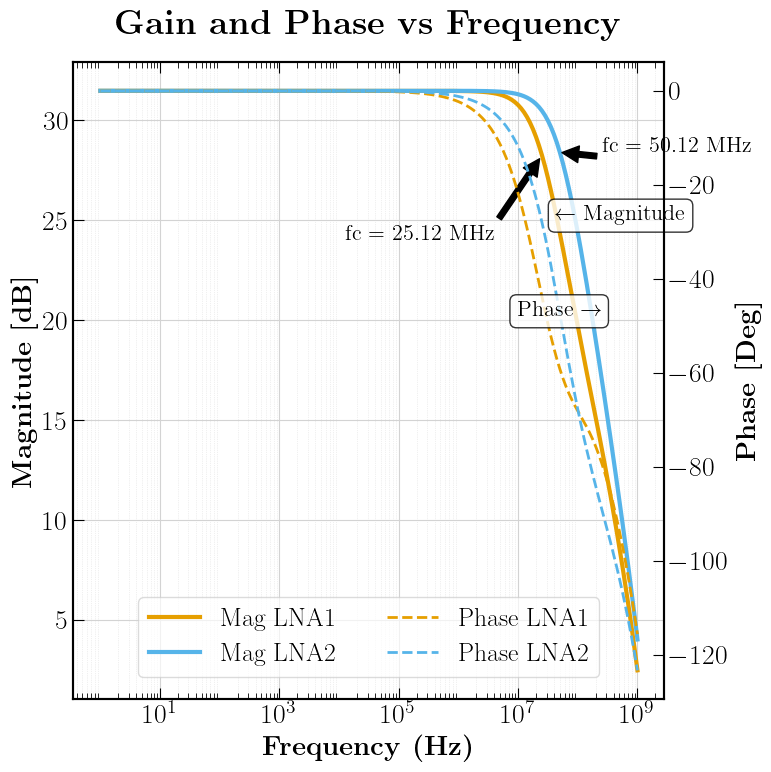

In [ ]:


# --- 2. Plot Setup ---
fig, ax_left = plt.subplots(figsize=(8, 8))
ax_right = ax_left.twinx()

ratio_color = 'black'

# --- 3. Plotting ---
l1 = ax_left.semilogx(gain['f'], gain['mag1'], label='Mag LNA1', color=colors[1], lw=3)
l2 = ax_left.semilogx(gain['f'], gain['mag2'], label='Mag LNA2', color=colors[2], lw=3)

phase_style = '--'
l3 = ax_right.semilogx(gain['f'], gain['phase1'], label='Phase LNA1', color=colors[1], lw=2, linestyle=phase_style)
l4 = ax_right.semilogx(gain['f'], gain['phase2'], label='Phase LNA2', color=colors[2], lw=2, linestyle=phase_style)

# --- 4. Formatting ---
plt.title(r'\textbf{Gain and Phase vs Frequency}', fontsize=25, pad=20)

# 1. Define the Locator
# This tells matplotlib to place ticks at 2, 3, 4...9 for every decade
minor_locator = LogLocator(base=10.0, subs=(0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9), numticks=12)

# 2. Apply it to the X-Axis
ax_left.xaxis.set_minor_locator(minor_locator)

# 3. Draw the Grids
ax_left.grid(True, which='major', linestyle='-', linewidth=0.8, color='lightgray')
ax_left.grid(True, which='minor', axis='x', linestyle=':', linewidth=0.5, color='lightgray', alpha=0.7)

# =========================================================

ax_left.set_xlabel(r'\textbf{Frequency (Hz)}', fontsize=20)
ax_left.set_ylabel(r'\textbf{Magnitude [dB]}', fontsize=20)
ax_left.tick_params(axis='both', which='major', labelsize=20)

ax_right.set_ylabel(r'\textbf{Phase [Deg]}', fontsize=20, color=ratio_color)
ax_right.tick_params(axis='y', labelsize=20, colors=ratio_color)
ax_right.spines['right'].set_color(ratio_color)

# --- 5. Legend ---
lines = l1 + l2 + l3 + l4
labels = [l.get_label() for l in lines]

ax_left.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.18),
               fancybox=True, shadow=False, ncol=2, fontsize=18.5, framealpha=0.7)

# --- 6. Annotations ---
ax_left.annotate(r'$\leftarrow$ Magnitude', xy=(0.815, 0.75), xycoords='axes fraction',
                 fontsize=16, fontweight='bold', color='black',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec='black', alpha=0.8))

ax_right.annotate(r'Phase $\rightarrow$', xy=(0.75, 0.6), xycoords='axes fraction',
                  fontsize=16, fontweight='bold', color=ratio_color,
                  bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=ratio_color, alpha=0.8))

# Annotate cutoff frequencies
fc1_loc = fc_loc(gain['mag1'])
fc2_loc = fc_loc(gain['mag2'])          
ax_left.annotate(f'fc = {np.round(gain['f'][fc1_loc]/1e6,2)} MHz', xy=(gain['f'][fc1_loc], gain['mag1'][fc1_loc]), xytext=(gain['f'][fc1_loc]*0.0005, gain['mag1'][fc1_loc]*0.85),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax_left.annotate(f'fc = {np.round(gain['f'][fc2_loc]/1e6,2)} MHz', xy=(gain['f'][fc2_loc], gain['mag2'][fc2_loc]), xytext=(gain['f'][fc2_loc]*5, gain['mag2'][fc2_loc]*1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )


plt.tight_layout()
plt.savefig(f"{plot_dir}/gain.png", dpi=300)
plt.show()

## Gain drift plot 

In [ ]:
col = ['T', 'LNA1', 'LNA2']
drift.columns = col

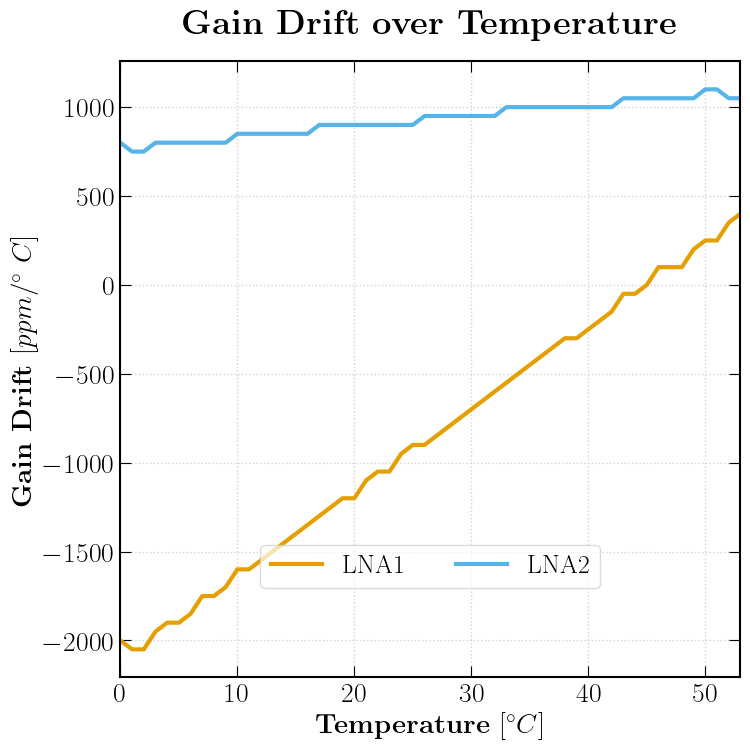

In [ ]:
fix,ax = plt.subplots(figsize=(8,8))
ax.plot(drift['T'], np.gradient(drift['LNA1'])*1e6, label='LNA1', color=colors[1], lw=3)
ax.plot(drift['T'], np.gradient(drift['LNA2'])*1e6, label='LNA2', color=colors[2], lw=3)
ax.set_title(r'\textbf{Gain Drift over Temperature}', fontsize=25, pad=20)
ax.set_xlabel(r'\textbf{Temperature} $[^{\circ} C]$', fontsize=20)
ax.set_ylabel(r'\textbf{Gain Drift $[ppm/^{\circ}~C]$}', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
ax.legend(loc='center', bbox_to_anchor=(0.5, 0.18),
          fancybox=True, shadow=False, ncol=2, fontsize=18.5,
          framealpha=0.7)       
ax.set_xlim(0,53)   
plt.savefig(f"{plot_dir}/Gain_drift.png", dpi=300)                                                                                                                 

### Gain drift MC 

In [ ]:
Gain_drift_MC1 = pd.read_csv(f"{dir}/gain_MC_LNA1_27degC.csv")
Gain_drift_MC2 = pd.read_csv(f"{dir}/gain_MC_LNA2_27degC.csv")
Gain_drift_MC2.head()

,temp (C),/voutdiff2 Vcm -0.5 mcparamset 1 (V),/voutdiff2 Vcm -0.5 mcparamset 2 (V),/voutdiff2 Vcm -0.5 mcparamset 3 (V),/voutdiff2 Vcm -0.5 mcparamset 4 (V),/voutdiff2 Vcm -0.5 mcparamset 5 (V),/voutdiff2 Vcm -0.5 mcparamset 6 (V),/voutdiff2 Vcm -0.5 mcparamset 7 (V),/voutdiff2 Vcm -0.5 mcparamset 8 (V),/voutdiff2 Vcm -0.5 mcparamset 9 (V),...,/voutdiff2 Vcm 0.5 mcparamset 11 (V),/voutdiff2 Vcm 0.5 mcparamset 12 (V),/voutdiff2 Vcm 0.5 mcparamset 13 (V),/voutdiff2 Vcm 0.5 mcparamset 14 (V),/voutdiff2 Vcm 0.5 mcparamset 15 (V),/voutdiff2 Vcm 0.5 mcparamset 16 (V),/voutdiff2 Vcm 0.5 mcparamset 17 (V),/voutdiff2 Vcm 0.5 mcparamset 18 (V),/voutdiff2 Vcm 0.5 mcparamset 19 (V),/voutdiff2 Vcm 0.5 mcparamset 20 (V)
0,0.0,34.5576,35.3537,34.3546,35.4693,36.1962,35.9938,34.5347,35.1428,35.5421,...,35.8654,35.7143,37.1406,36.5406,35.7300,36.5675,36.1045,36.2491,35.1688,35.9412
1,1.0,34.5609,35.3566,34.3558,35.4700,36.1958,35.9940,34.5366,35.1428,35.5427,...,35.8673,35.7172,37.1390,36.5410,35.7291,36.5688,36.1051,36.2517,35.1705,35.9404
2,2.0,34.5642,35.3594,34.3570,35.4706,36.1955,35.9942,34.5385,35.1428,35.5432,...,35.8692,35.7201,37.1374,36.5414,35.7282,36.5702,36.1057,36.2542,35.1721,35.9395
3,3.0,34.5675,35.3623,34.3582,35.4713,36.1952,35.9945,34.5404,35.1428,35.5438,...,35.8710,35.7230,37.1359,36.5418,35.7273,36.5715,36.1063,36.2568,35.1738,35.9387
4,4.0,34.5708,35.3651,34.3595,35.4719,36.1949,35.9947,34.5423,35.1428,35.5444,...,35.8729,35.7259,37.1344,36.5422,35.7265,36.5729,36.1069,36.2593,35.1754,35.9379


In [ ]:
np.size(Gain_drift_MC1,axis = 0)
# noise_LNA1.head()

Vcm = [-0.5,0,0.5]  # For Vcm = -0.5, 0.0 and 0.5 V
num_sim = int((np.size(Gain_drift_MC1, axis = 1))/len(Vcm))  # Number of MC simulation for each Vcm
col1 = ['T']
col2 = ['T']
for i in Vcm: 
    for j in range(num_sim):
        col1.append(f'LNA1_Vcm{str(i)}_MC{j+1}')
        col2.append(f'LNA2_Vcm{str(i)}_MC{j+1}')
Gain_drift_MC1.columns = col1
Gain_drift_MC2.columns = col2
Gain_drift_MC2.head()

,T,LNA2_Vcm-0.5_MC1,LNA2_Vcm-0.5_MC2,LNA2_Vcm-0.5_MC3,LNA2_Vcm-0.5_MC4,LNA2_Vcm-0.5_MC5,LNA2_Vcm-0.5_MC6,LNA2_Vcm-0.5_MC7,LNA2_Vcm-0.5_MC8,LNA2_Vcm-0.5_MC9,...,LNA2_Vcm0.5_MC11,LNA2_Vcm0.5_MC12,LNA2_Vcm0.5_MC13,LNA2_Vcm0.5_MC14,LNA2_Vcm0.5_MC15,LNA2_Vcm0.5_MC16,LNA2_Vcm0.5_MC17,LNA2_Vcm0.5_MC18,LNA2_Vcm0.5_MC19,LNA2_Vcm0.5_MC20
0,0.0,34.5576,35.3537,34.3546,35.4693,36.1962,35.9938,34.5347,35.1428,35.5421,...,35.8654,35.7143,37.1406,36.5406,35.7300,36.5675,36.1045,36.2491,35.1688,35.9412
1,1.0,34.5609,35.3566,34.3558,35.4700,36.1958,35.9940,34.5366,35.1428,35.5427,...,35.8673,35.7172,37.1390,36.5410,35.7291,36.5688,36.1051,36.2517,35.1705,35.9404
2,2.0,34.5642,35.3594,34.3570,35.4706,36.1955,35.9942,34.5385,35.1428,35.5432,...,35.8692,35.7201,37.1374,36.5414,35.7282,36.5702,36.1057,36.2542,35.1721,35.9395
3,3.0,34.5675,35.3623,34.3582,35.4713,36.1952,35.9945,34.5404,35.1428,35.5438,...,35.8710,35.7230,37.1359,36.5418,35.7273,36.5715,36.1063,36.2568,35.1738,35.9387
4,4.0,34.5708,35.3651,34.3595,35.4719,36.1949,35.9947,34.5423,35.1428,35.5444,...,35.8729,35.7259,37.1344,36.5422,35.7265,36.5729,36.1069,36.2593,35.1754,35.9379


Offsets for LNA1: [46, 41, 46, 10, 54, 13, 7, 27, 40, 2, 47, 43, 48, 11, 13, 9, 29, 41, 3, 51, 46, 52, 14, 16, 10, 32, 44, 7]


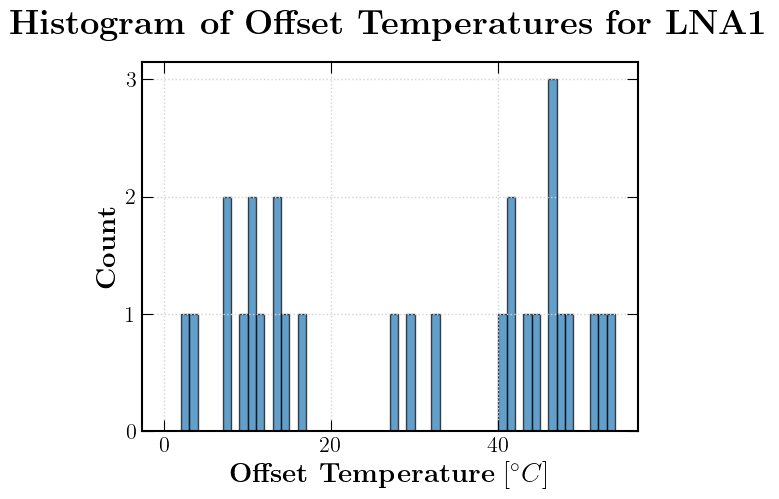

In [ ]:
#find the offset zero 
offset = []
for i in Vcm:               
    for j in range(num_sim):
        signs = np.sign(np.gradient(Gain_drift_MC1[f'LNA1_Vcm{str(i)}_MC{j+1}'], Gain_drift_MC1['T']))
        change_indices = np.where(np.diff(signs))[0]
        change_temps = Gain_drift_MC1['T'].iloc[change_indices + 1]  # +1 due to diff reducing the array size by 1
        if np.size(change_temps) > 0:
            offset.append(int(change_temps.iloc[0]))
        # print("Temperatures where gain drift derivative changes sign for LNA1 Vcm=0V:")
print("Offsets for LNA1:", offset)  

plt.hist(offset, bins=range(0, 55, 1), edgecolor='black', alpha=0.7)
plt.title(r'\textbf{Histogram of Offset Temperatures for LNA1}', fontsize=25, pad=20)
plt.xlabel(r'\textbf{Offset Temperature} $[^{\circ} C]$', fontsize=20)
plt.ylabel(r'\textbf{Count}', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
# plt.savefig(f"{plot_dir}/Offset_Temperature_LNA1.png", dpi=300)
plt.show()  

Offsets for LNA1: [20, 4, 49, 24, 1, 54, 31, 8]


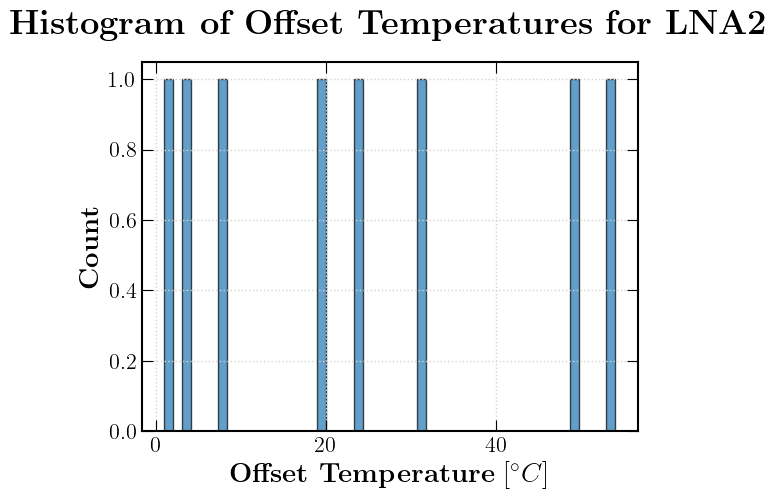

In [ ]:
offset = []
for i in Vcm:               
    for j in range(num_sim):
        signs = np.sign(np.gradient(Gain_drift_MC2[f'LNA2_Vcm{str(i)}_MC{j+1}'], Gain_drift_MC2['T']))
        change_indices = np.where(np.diff(signs))[0]
        change_temps = Gain_drift_MC2['T'].iloc[change_indices + 1]  # +1 due to diff reducing the array size by 1
        if np.size(change_temps) > 0:
            offset.append(int(change_temps.iloc[0]))
        # print("Temperatures where gain drift derivative changes sign for LNA1 Vcm=0V:")
print("Offsets for LNA1:", offset)  

plt.hist(offset, bins=50, edgecolor='black', alpha=0.7)
plt.title(r'\textbf{Histogram of Offset Temperatures for LNA2}', fontsize=25, pad=20)
plt.xlabel(r'\textbf{Offset Temperature} $[^{\circ} C]$', fontsize=20)
plt.ylabel(r'\textbf{Count}', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
# plt.savefig(f"{plot_dir}/Offset_Temperature_LNA1.png", dpi=300)
plt.show()  

## Signal response

In [ ]:
response = pd.read_csv(f"{dir}/slew_rate.csv")
vin = pd.read_csv(f"{dir}/slew_rate_vin.csv")
np.size(response,axis = 0)
vin = vin.apply(pd.to_numeric, errors='coerce')[0:145]
vin.head()

,time (s),/vindiff1 (V)
0,0.000000e+00,-0.014912
1,4.000000e-09,-0.014912
2,1.200000e-08,-0.014912
3,2.800000e-08,-0.014912
4,6.000000e-08,-0.014912


In [ ]:
def signal_cv_file(df,slice_start,slice_end):
    time = df.filter(like='time (s)', axis=1)
    sig = df.filter(like='/voutdiff', axis=1)
    temp = np.arange(-40,81,1)
    col_time = []
    col_sig = []
    for i in range(np.size(sig,axis =1 )):
        col_time.append(f't_T{str(temp[i])}')
        col_sig.append(f'v_T{str(temp[i])}')
    time.columns = col_time
    sig.columns = col_sig
    time = time.apply(pd.to_numeric, errors='coerce')[slice_start:slice_end]
    sig = sig.apply(pd.to_numeric, errors='coerce')[slice_start:slice_end]
    return time,sig
temp = np.arange(-40,81,1)
time,sig = signal_cv_file(pd.read_csv(f"{dir}/slew_rate_LNA2.csv"),0,145)
time2,sig2 = signal_cv_file(response,0,145)

In [ ]:
# # Show the example plot for T = 27 deg C
# T_index = 67  # Index for T = 27 deg C in the temp array
# fig, ax = plt.subplots(figsize=(8,8))
# plt.title(r"\textbf{Example of signal response $@27^{\circ}~C$}", fontsize=25, pad=20)
# ax.plot(vin['time (s)']*1e6, vin['/vindiff1 (V)'], color='red', lw=3, label='Vin diff')
# ax.plot(time[f't_T{str(temp[T_index])}']*1e6, sig[f'v_T{str(temp[T_index])}'], color=colors[1], lw=3, label = 'Vout diff')
# ax.set_xlabel(r'\textbf{Time} $\boldsymbol{(\mu s)}$', fontsize=20)
# ax.set_ylabel(r'\textbf{Voltage} $\boldsymbol{(V)}$', fontsize=20)
# # ax.tick_params(axis='both', which='major', labelsize=14)
# ax.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
# plt.legend(fontsize=14, loc = 'upper right')
# plt.savefig(f"{plot_dir}/Output_Response_27degC.png", dpi=300)
# plt.show()

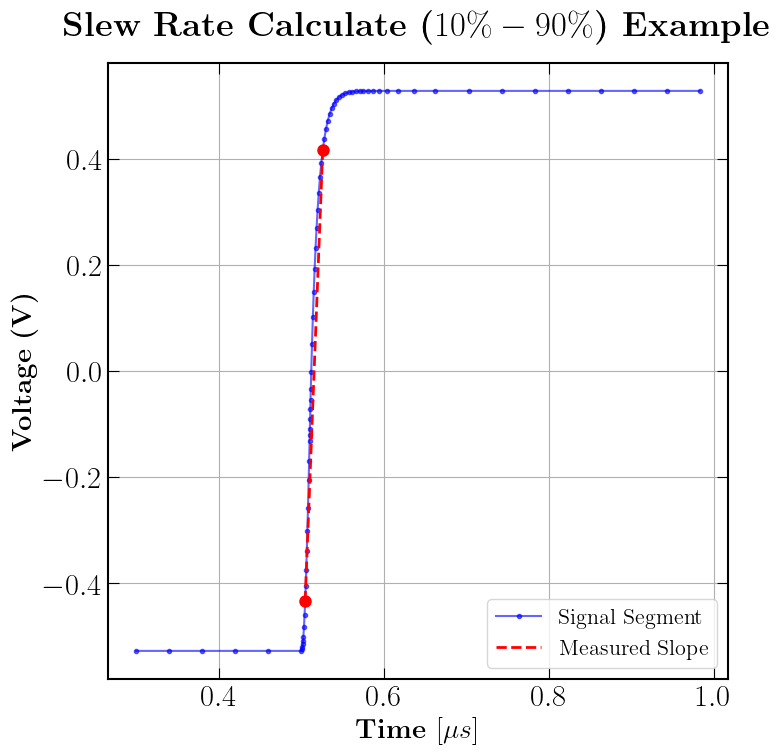

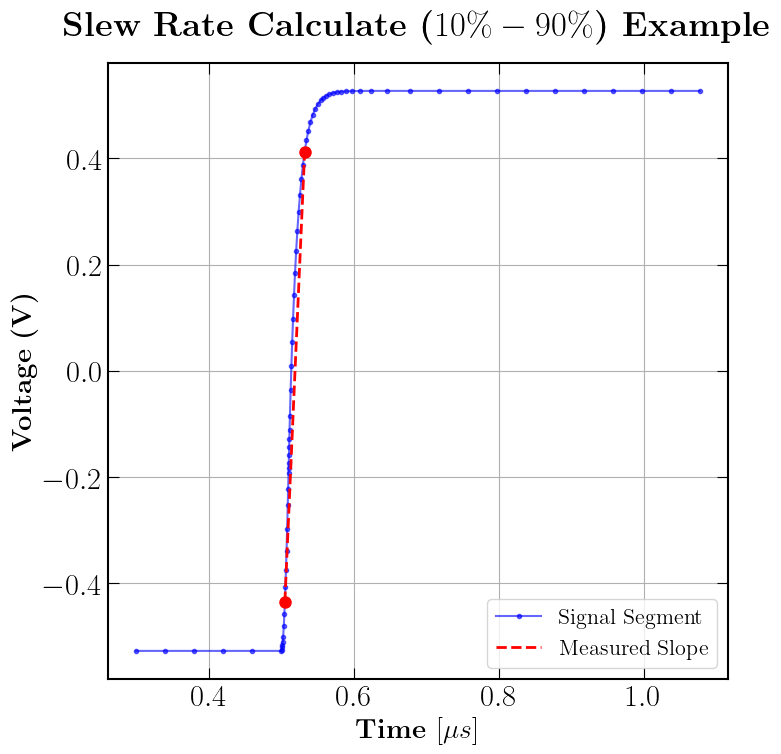

40.248213504448
37.817516905101506
39.13188426414498
For LNA1 Slew Rate (V/us)
Max: 40.25 V/us
Min: 37.82 V/us
Avg: 39.13 V/us
For LNA2 Slew Rate (V/us)
Max: 31.13 V/us
Min: 28.92 V/us
Avg: 29.97 V/us


In [ ]:
#Selected range for slew rate calculation
cut = np.array(np.arange(10,80,1))
def slew_rate(time_df, sig_df, cut_indices):
    # --- Settings ---
    upper_lim = 0.9  # 80%
    lower_lim = 0.1  # 15%
    slew_results = []
    rise_results = []
    # Initialize variables for plotting later (stores the last iteration's data)
    debug_t_seg = None
    debug_v_seg = None
    p1 = None # Point 1 (time, voltage)
    p2 = None # Point 2 (time, voltage)

    # --- Calculation Loop ---
    # range(len(sig_df.columns)) ensures we iterate correctly even if column names differ
    for i in range(len(sig_df.columns)):
        
        # 1. Extract the segment as a Series (Voltage and Time)
        v_seg = sig_df.iloc[cut_indices, i]
        t_seg = time_df.iloc[cut_indices, i]
        
        # 2. Dynamic Swing Calculation (More robust than hardcoding 2*max)
        #    This finds the actual Top and Bottom of the signal in this window
        v_high_peak = v_seg.max()
        v_low_peak = v_seg.min()
        full_swing = v_high_peak - v_low_peak
        
        # 3. Define Threshold Voltages
        v_target_low = v_low_peak + (lower_lim * full_swing)
        v_target_high = v_low_peak + (upper_lim * full_swing)
        
        # 4. Find the index CLOSEST to these target voltages
        #    We use np.abs().argmin() to find the index within the segment
        idx_low = (np.abs(v_seg - v_target_low)).argmin()
        idx_high = (np.abs(v_seg - v_target_high)).argmin()
        
        # 5. Get the actual Time and Voltage at those indices
        t1 = t_seg.iloc[idx_low]
        v1 = v_seg.iloc[idx_low]
        
        t2 = t_seg.iloc[idx_high]
        v2 = v_seg.iloc[idx_high]
        
        # 6. Calculate Slew Rate (dV / dt)
        sr = (v2 - v1) / (t2 - t1) / 1e6 # Result in V/us
        slew_results.append(sr)
        rise_results.append(1e6 * (t2 - t1)) # Rise time in us
        # Save data for the debug plot (overwrites until the last loop)
        debug_t_seg = t_seg
        debug_v_seg = v_seg
        p1 = (t1, v1)
        p2 = (t2, v2)

    # --- PLOTTING TEST SECTION (Outside the loop) ---
    # This plots only the LAST column processed, serving as a sanity check
    plt.figure(figsize=(8,8))
    plt.title(r"\textbf{Slew Rate Calculate ($10\%-90\%$) Example}", fontsize=25, pad=20)
    # 1. Plot the Cut Region
    plt.plot(debug_t_seg*1e6, debug_v_seg, 'b.-', label='Signal Segment', alpha=0.6)
    
    # 2. Plot the Calculation Points
    plt.plot([p1[0]*1e6, p2[0]*1e6], [p1[1], p2[1]], 'ro', markersize=8)
    
    # 3. Draw the Slope Line
    plt.plot([p1[0]*1e6, p2[0]*1e6], [p1[1], p2[1]], 'r--', linewidth=2, label='Measured Slope')
    
    plt.xlabel(r'\textbf{Time $[\mu s]$}',fontsize=20)
    plt.ylabel(r'\textbf{Voltage (V)}',fontsize=20)
    plt.grid(True)
    plt.legend()
    plt.savefig(f"{plot_dir}/Slew_Rate_estimate.png", dpi=300)
    plt.show()

    return slew_results, rise_results

# Call the function
sr_values, rt_values = slew_rate(time, sig, cut)
sr_values2, rt_values2 = slew_rate(time2, sig2, cut)
print(max(sr_values))
print(min(sr_values))
print(np.mean(sr_values))
# print(rt_values)
# print("Slew Rates calculated.")

print("For LNA1 Slew Rate (V/us)")
print(f"Max: {max(sr_values):.2f} V/us")
print(f"Min: {min(sr_values):.2f} V/us")
print(f"Avg: {np.mean(sr_values):.2f} V/us")    

print("For LNA2 Slew Rate (V/us)")
print(f"Max: {max(sr_values2):.2f} V/us")
print(f"Min: {min(sr_values2):.2f} V/us")
print(f"Avg: {np.mean(sr_values2):.2f} V/us")       

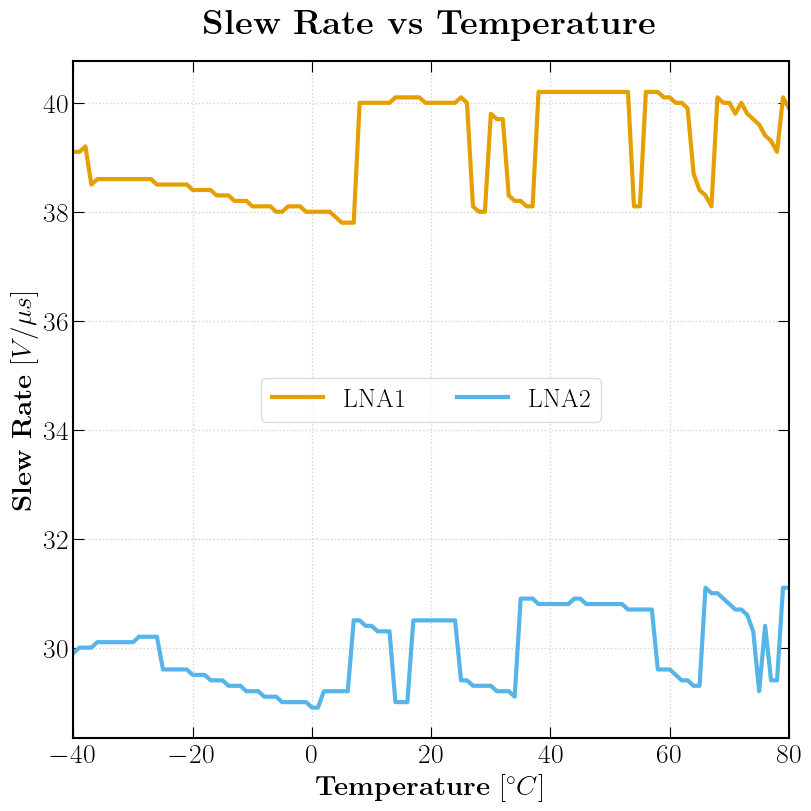

In [ ]:
plt.figure(figsize=(8, 8), layout="constrained")
plt.plot(temp, np.round(sr_values,1), label='LNA1', color=colors[1], lw=3)
plt.plot(temp, np.round(sr_values2,1), label='LNA2', color=colors[2], lw=3)
plt.title(r'\textbf{Slew Rate vs Temperature}', fontsize=25, pad=20)
plt.xlabel(r'\textbf{Temperature} $[^{\circ} C]$', fontsize=20)
plt.ylabel(r'\textbf{Slew Rate} $[V/ \mu s]$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
plt.legend(loc='center', bbox_to_anchor=(0.5, 0.5),
          fancybox=True, shadow=False, ncol=2, fontsize=18.5,
          framealpha=0.7)       
plt.xlim(-40,80)   
plt.savefig(f"{plot_dir}/Slew_rate.png", dpi=300)                                                                                                                 
plt.show()

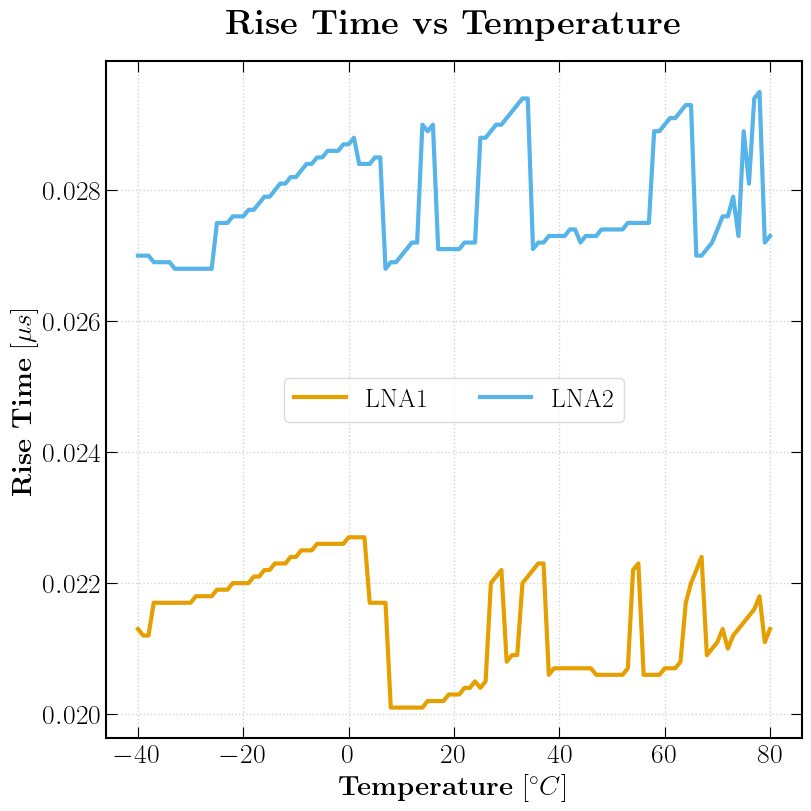

In [ ]:
plt.figure(figsize=(8, 8), layout="constrained")
plt.plot(temp, np.round(rt_values,4), label='LNA1', color=colors[1], lw=3)
plt.plot(temp, np.round(rt_values2,4), label='LNA2', color=colors[2], lw=3)
plt.title(r'\textbf{Rise Time vs Temperature}', fontsize=25, pad=20)
plt.xlabel(r'\textbf{Temperature} $[^{\circ} C]$', fontsize=20)
plt.ylabel(r'\textbf{Rise Time} $[\mu s]$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
plt.legend(loc='center', bbox_to_anchor=(0.5, 0.5),
          fancybox=True, shadow=False, ncol=2, fontsize=18.5,
          framealpha=0.7)       
# plt.xlim(-40,80)   
plt.savefig(f"{plot_dir}/Rise_time.png", dpi=300)                                                                                                                 
plt.show()

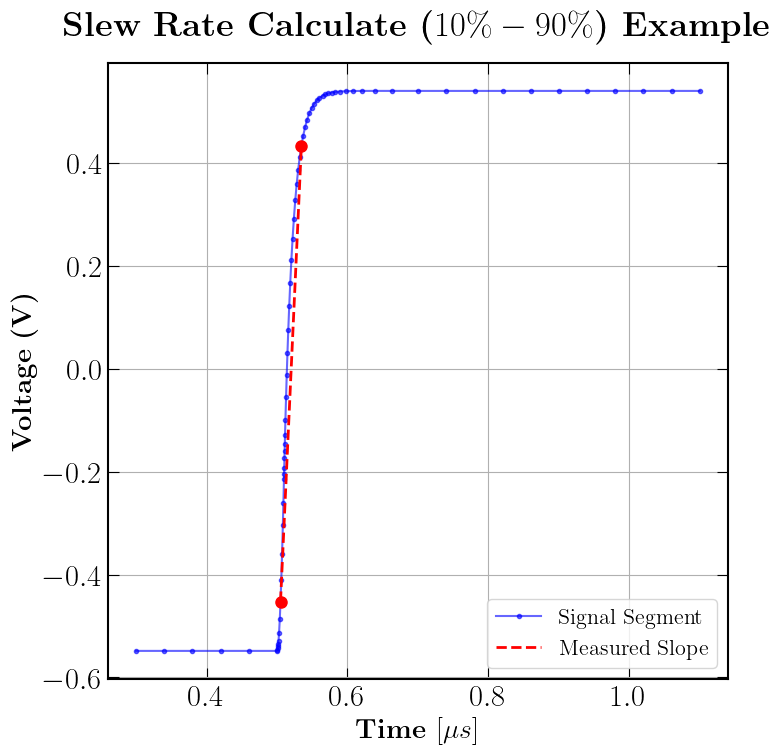

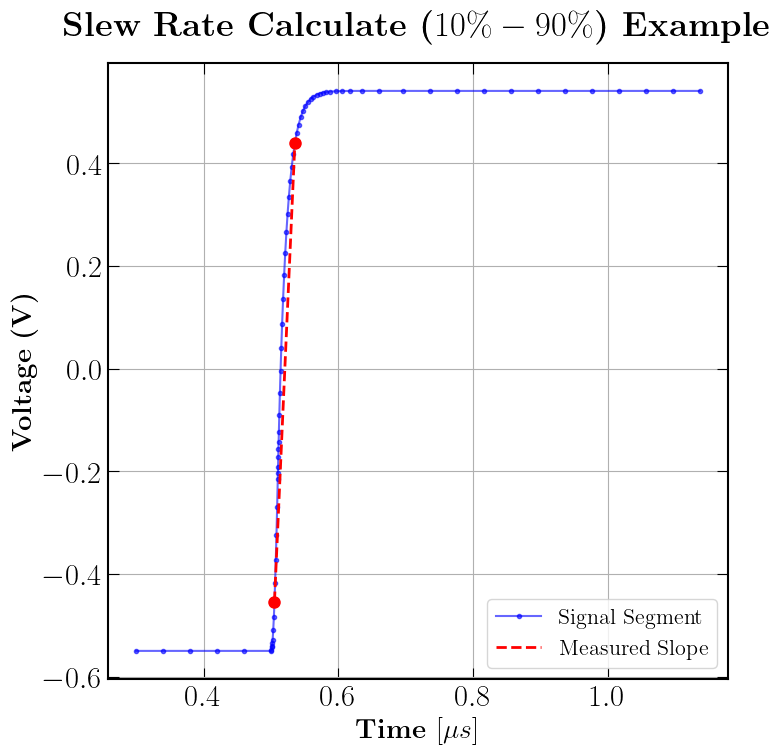

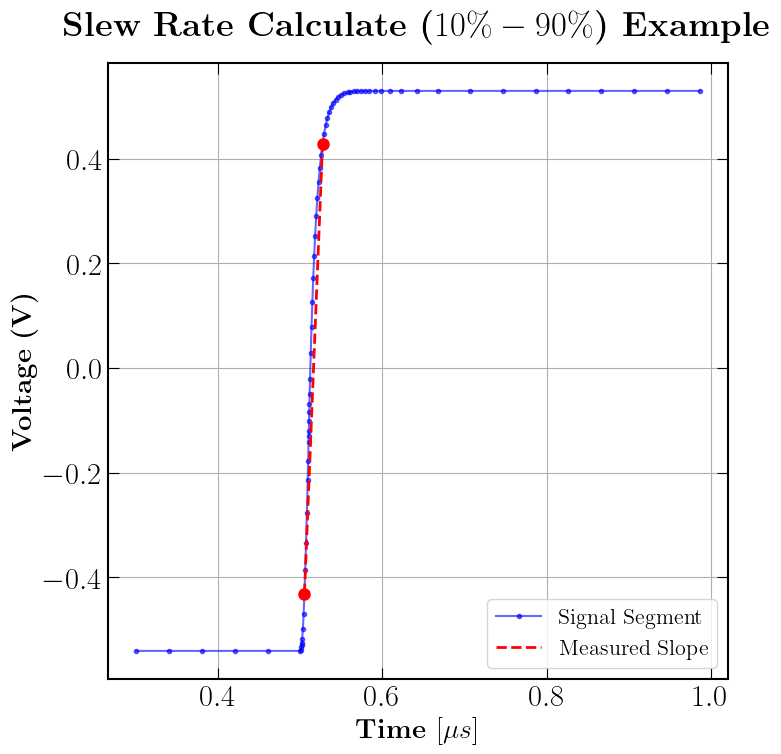

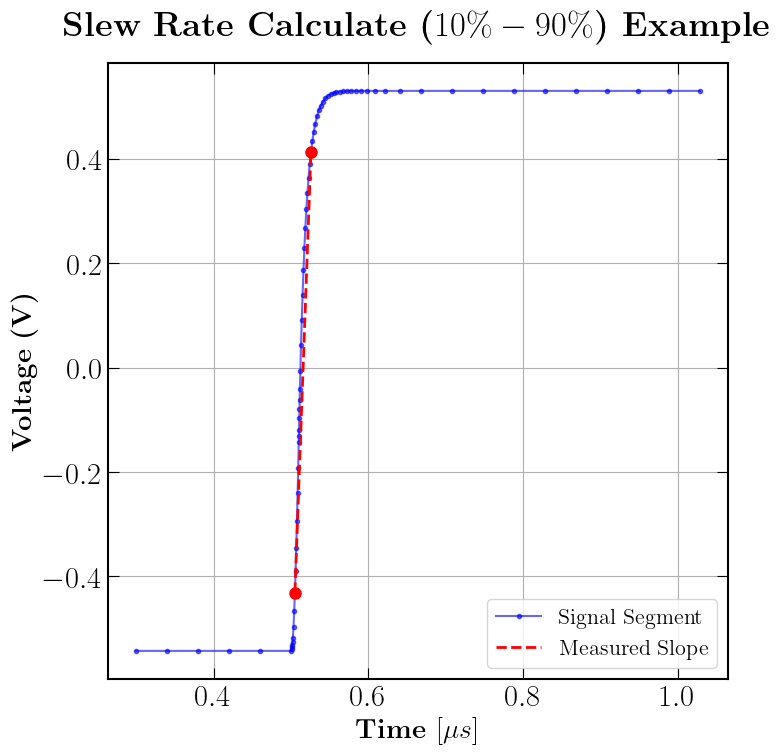

At 27 deg C Slew Rate (V/us)
--------------------------------------------------
LNA1:
 Avg (V/us) 29.921074210696364, Min (V/us) 28.13277454669865, Max (V/us) 31.70770404271551
LNA2:
 Avg (V/us) 38.9507165902638, Min (V/us) 36.448117497271824, Max (V/us) 42.33352826510727
--------------------------------------------------
At 45 deg C Slew Rate (V/us)
--------------------------------------------------
LNA1:
 Avg (V/us) 30.062479475180115, Min (V/us) 28.501738122827373, Max (V/us) 31.725018754688733
LNA2:
 Avg (V/us) 39.01292823132625, Min (V/us) 36.50154093528071, Max (V/us) 41.83191468545142
--------------------------------------------------





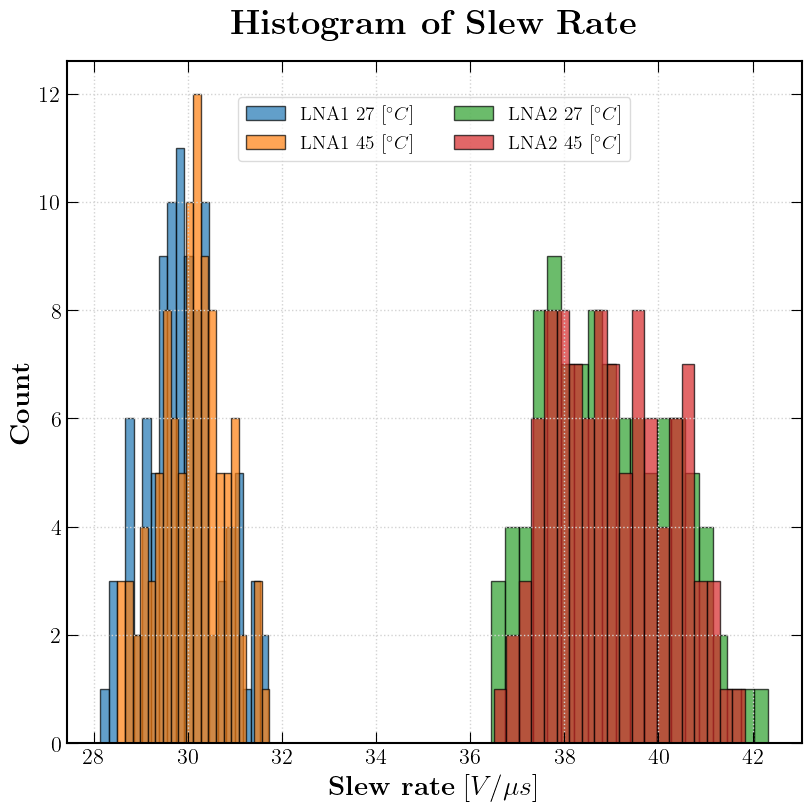

In [ ]:
# Load MC slew rate data at 27 and 45 deg C for both LNAs
time27_LNA1,sig27_LNA1 = signal_cv_file(pd.read_csv(f"{dir}/slew_rate_MC_27degC.csv"),     0,145)
time45_LNA1,sig45_LNA1 = signal_cv_file(pd.read_csv(f"{dir}/slew_rate_MC_45degC.csv"),     0,145)
time27_LNA2,sig27_LNA2 = signal_cv_file(pd.read_csv(f"{dir}/slew_rate_MC_27degC_LNA2.csv"),0,145)
time45_LNA2,sig45_LNA2 = signal_cv_file(pd.read_csv(f"{dir}/slew_rate_MC_45degC_LNA2.csv"),0,145)

sr27_LNA1,rt27_LNA1 = slew_rate(time27_LNA1,sig27_LNA1,cut)
sr45_LNA1,rt45_LNA1 = slew_rate(time45_LNA1,sig45_LNA1,cut)
sr27_LNA2,rt27_LNA2 = slew_rate(time27_LNA2,sig27_LNA2,cut)
sr45_LNA2,rt45_LNA2 = slew_rate(time45_LNA2,sig45_LNA2,cut)


# sr_values_45, rt_values_45 = slew_rate(time, sig, cut)

print("At 27 deg C Slew Rate (V/us)")
print("-" * 50)
print(f"LNA1:")
print(f" Avg (V/us) {np.mean(sr27_LNA1)}, Min (V/us) {min(sr27_LNA1)}, Max (V/us) {max(sr27_LNA1)}")
print(f"LNA2:")
print(f" Avg (V/us) {np.mean(sr27_LNA2)}, Min (V/us) {min(sr27_LNA2)}, Max (V/us) {max(sr27_LNA2)}")
print("-" * 50)     

# print(f" Avg (V/us) {np.mean(sr_values_45)}, Min (V/us) {min(sr_values_45)}, Max (V/us) {max(sr_values_45)}")
# print("-" * 50)
print("At 45 deg C Slew Rate (V/us)")           
print("-" * 50)
print(f"LNA1:")
print(f" Avg (V/us) {np.mean(sr45_LNA1)}, Min (V/us) {min(sr45_LNA1)}, Max (V/us) {max(sr45_LNA1)}")
print(f"LNA2:")
print(f" Avg (V/us) {np.mean(sr45_LNA2)}, Min (V/us) {min(sr45_LNA2)}, Max (V/us) {max(sr45_LNA2)}")
print("-" * 50)     


print("") # Empty line between Vcm groups
print("\n") # Empty line between LNA groups
plt.figure(figsize=(8, 8), layout="constrained")
plt.hist(sr27_LNA1, bins=20, edgecolor='black', alpha=0.7, label=r'LNA1 27 $[^{\circ} C]$')
plt.hist(sr45_LNA1, bins=20, edgecolor='black', alpha=0.7, label=r'LNA1 45 $[^{\circ} C]$')
plt.hist(sr27_LNA2, bins=20, edgecolor='black', alpha=0.7, label=r'LNA2 27 $[^{\circ} C]$')
plt.hist(sr45_LNA2, bins=20, edgecolor='black', alpha=0.7, label=r'LNA2 45 $[^{\circ} C]$')

plt.title(r'\textbf{Histogram of Slew Rate }', fontsize=25, pad=20)
plt.xlabel(r'\textbf{Slew rate} $[V/\mu s]$', fontsize=20)
plt.ylabel(r'\textbf{Count}', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='center', bbox_to_anchor=(0.5, 0.9),
          fancybox=True, shadow=False, ncol=2, fontsize=14,
          framealpha=0.7)
plt.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
plt.savefig(f"{plot_dir}/Hist_slew_rate.png", dpi=300)
plt.show()  

## Common mode rejection ratio (CMRR)

In [13]:
## Read data 

CMRR = pd.read_csv(f"{dir}/CMRR_MC100_T27.csv")

In [14]:
CMRR.head()

,freq (Hz),CMRR1 mcparamset 1 (dB),CMRR1 mcparamset 2 (dB),CMRR1 mcparamset 3 (dB),CMRR1 mcparamset 4 (dB),CMRR1 mcparamset 5 (dB),CMRR1 mcparamset 6 (dB),CMRR1 mcparamset 7 (dB),CMRR1 mcparamset 8 (dB),CMRR1 mcparamset 9 (dB),...,CMRR2 mcparamset 91 (dB),CMRR2 mcparamset 92 (dB),CMRR2 mcparamset 93 (dB),CMRR2 mcparamset 94 (dB),CMRR2 mcparamset 95 (dB),CMRR2 mcparamset 96 (dB),CMRR2 mcparamset 97 (dB),CMRR2 mcparamset 98 (dB),CMRR2 mcparamset 99 (dB),CMRR2 mcparamset 100 (dB)
0,1.00000,124.5,120.955,117.184,136.36,121.024,125.129,131.488,117.971,150.709,...,122.914,116.4,123.081,122.954,122.513,123.324,117.793,120.768,116.355,131.719
1,1.25893,124.5,120.955,117.184,136.36,121.024,125.129,131.488,117.971,150.709,...,122.914,116.4,123.081,122.954,122.513,123.324,117.793,120.768,116.355,131.719
2,1.58489,124.5,120.955,117.184,136.36,121.024,125.129,131.488,117.971,150.709,...,122.914,116.4,123.081,122.954,122.513,123.324,117.793,120.768,116.355,131.719
3,1.99526,124.5,120.955,117.184,136.36,121.024,125.129,131.488,117.971,150.709,...,122.914,116.4,123.081,122.954,122.513,123.324,117.793,120.768,116.355,131.719
4,2.51189,124.5,120.955,117.184,136.36,121.024,125.129,131.488,117.971,150.709,...,122.914,116.4,123.081,122.954,122.513,123.324,117.793,120.768,116.355,131.719


In [16]:
MC_num = (np.size(CMRR, axis=1) - 1) / 2 # Exclude frequency column
print(f"Detected {MC_num} MC simulations per CMRR ")
# Assign column names
CMRR_type = ['LNA1', 'LNA2']    
col = ['f']
for c in CMRR_type:
    for j in range(int(MC_num)):
        col.append(f'{c}_MC{j+1}')
CMRR.columns = col
CMRR = CMRR.apply(pd.to_numeric, errors='coerce')
CMRR.head()

Detected 100.0 MC simulations per CMRR 


,f,LNA1_MC1,LNA1_MC2,LNA1_MC3,LNA1_MC4,LNA1_MC5,LNA1_MC6,LNA1_MC7,LNA1_MC8,LNA1_MC9,...,LNA2_MC91,LNA2_MC92,LNA2_MC93,LNA2_MC94,LNA2_MC95,LNA2_MC96,LNA2_MC97,LNA2_MC98,LNA2_MC99,LNA2_MC100
0,1.00000,124.5,120.955,117.184,136.36,121.024,125.129,131.488,117.971,150.709,...,122.914,116.4,123.081,122.954,122.513,123.324,117.793,120.768,116.355,131.719
1,1.25893,124.5,120.955,117.184,136.36,121.024,125.129,131.488,117.971,150.709,...,122.914,116.4,123.081,122.954,122.513,123.324,117.793,120.768,116.355,131.719
2,1.58489,124.5,120.955,117.184,136.36,121.024,125.129,131.488,117.971,150.709,...,122.914,116.4,123.081,122.954,122.513,123.324,117.793,120.768,116.355,131.719
3,1.99526,124.5,120.955,117.184,136.36,121.024,125.129,131.488,117.971,150.709,...,122.914,116.4,123.081,122.954,122.513,123.324,117.793,120.768,116.355,131.719
4,2.51189,124.5,120.955,117.184,136.36,121.024,125.129,131.488,117.971,150.709,...,122.914,116.4,123.081,122.954,122.513,123.324,117.793,120.768,116.355,131.719


<Figure size 1000x800 with 0 Axes>

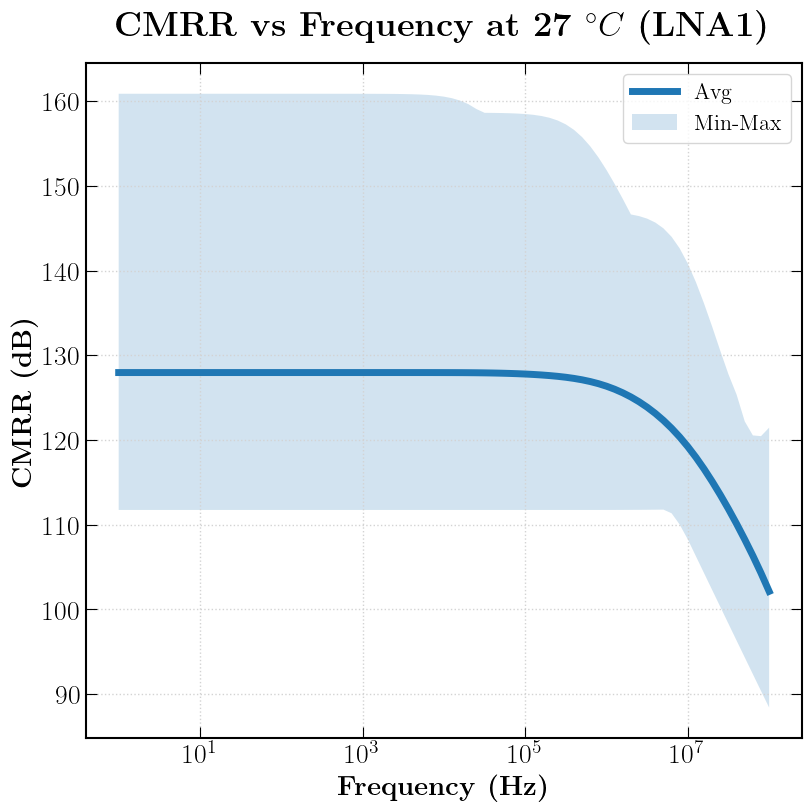

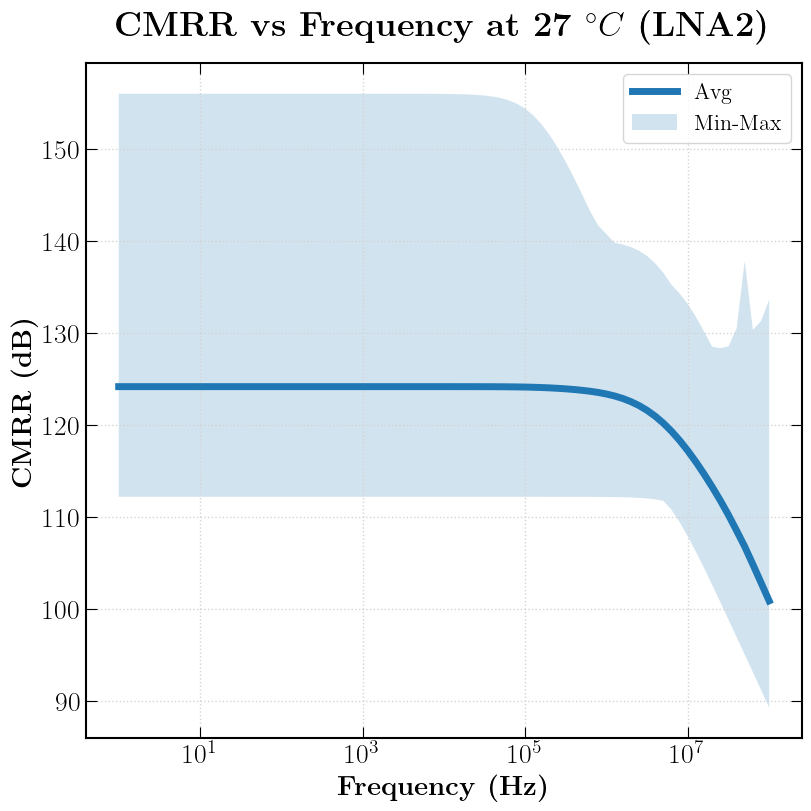

In [31]:
#Plot the CMRR results
plt.figure(figsize=(10,8))
for c in CMRR_type: 
    plt.figure(figsize=(8, 8), layout="constrained")
    subset = CMRR.filter(like=c)
    # Calculate the statistic curves (entire frequency range)
    avg_curve = subset.mean(axis=1)
    max_curve = subset.max(axis=1)
    min_curve = subset.min(axis=1)
    
    plt.semilogx(CMRR['f'], avg_curve, label=f'Avg', lw=5)
    plt.fill_between(CMRR['f'], min_curve, max_curve, alpha=0.2, label=f'Min-Max ')
    plt.title(fr'\textbf{{CMRR vs Frequency at 27 $^{{\circ}} C$ ({c})}}', fontsize=25, pad=20)
    plt.xlabel(r'\textbf{Frequency (Hz)}', fontsize=20)
    plt.ylabel(r'\textbf{CMRR (dB)}', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
    plt.legend(loc='upper right')       
    # plt.xlim(10,50e6)   
# plt.ylim(40,100)                                                                                                                 
    plt.savefig(f"{plot_dir}/CMRR_{c}.png", dpi=300)
plt.show()
# noise_LNA1_27 = pd.read_csv(f"{dir}/Noise_MC_100L